### <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img  alt="Licença Creative Commons" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a><br />Este trabalho está licenciado com uma Licença <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons - Atribuição-NãoComercial-CompartilhaIgual 4.0 Internacional</a>.

### <div class="license">
<span>Licença CC BY-NC-SA</span>
<span>Carlos Mandele</span>
</div>

# <h1 style="font-size:250%;text-align:center">Machine Learning:</h1>
## <h1 style="font-size:250%;text-align:center">Modelagem e Inferência Estatistica da biodegradação de compostos químicos usando algoritmos classicos de machine learning </h1>
<h4 style="font-size:150%;text-align:center">by Carlos Mandele</h4>
<h5 style="font-size:100%;text-align:center">Data Scientist, in progress</h5>

Modelagem e Inferência Estatistica da biodegradação de compostos quimicos

## Objeto:

* Importação das bibliotecas Python;
* Carregamento do conjunto de  dados;
* Leitura da base de dados;
* Explorando um conjunto de dados;
* Estatística descritiva;
* Visualização de dados;
* Análise de nuvem de pontos;
* Análise de correlações;
* Análise da informação mútua;
* Determinação da classe alvo e dos preditores;
* Estabelecendo uma base de referência;
* Codificação de dados categóricos;
* Divisão dos dados de treinamento e teste;
* Escolha dos algoritmos de classificação supervisionada:
* Logistics classification;
* Random forest;
* Doped gradient shafts;
* Treinamento de modelo por validação cruzada;
* Avaliação do modelo;
* Validação final do modelo;

## Importação das bibliotecas Python


In [3]:
# Importando todas as bibliotecas, classes e funções
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib

# Biblioteca «sys», usada apenas para obter números de versão
import sys

# Ativa a exibição de gráficos na página do Jupyter Notebook
%matplotlib inline

# Importando IPython para verificar sua versão e exibir conteúdo no jupyter notebook
import IPython

print("Bibliotecas Python importadas")

Bibliotecas Python importadas


In [5]:
# Vérification des versions des bibliothèques Python importées
print('Versão do Python: ',sys.version)
print('Versão de IPython: ',IPython.__version__)
print('Versão do NumPy: ',np.__version__)
print('Versão de Matplotlib: ',matplotlib.__version__)
print('Versão de SciPy: ',scipy.__version__)
print('Versão do Pandas: ',pd.__version__)
print('Versão de Scikit-Learn: ',sklearn.__version__)

Versão do Python:  3.10.12 (main, Jun 11 2023, 05:26:28) [GCC 11.4.0]
Versão de IPython:  7.34.0
Versão do NumPy:  1.22.4
Versão de Matplotlib:  3.7.1
Versão de SciPy:  1.10.1
Versão do Pandas:  1.5.3
Versão de Scikit-Learn:  1.2.2


## Estabelecendo a possibilidade de reprodutibilidade

O aprendizado de máquina e o processamento de dados às vezes envolve processos aleatórios. Para poder reproduzir e comparar os resultados de um experimento, você ajustará temporariamente o estado aleatório graças a um único germe aleatório.

Durante o estudo, é estabelecido temporariamente o estado aleatório para reprodutibilidade, contudo reiterando o experimento com distintos germes ou estados aleatórios e obtém-se a média dos resultados.
<br/>
**Obs**: Para um sistema em produção, você simplesmente revive o estado puramente aleatório com a instrução `GERME_ALEATORIO = None`

In [6]:
import os

# Definir um germe aleatório
GERME_ALEATORIO = 21

# Definir um estado aleatório para Python
os.environ['PYTHONHASHSEED'] = str(GERME_ALEATORIO)

# Definir um estado aleatório para Python random
import random
random.seed(GERME_ALEATORIO)

# Definir um estado aleatório para NumPy
import numpy as np
np.random.seed(GERME_ALEATORIO)

print("Germe aleatório fixado")

Germe aleatório fixado


## Base de dados QSAR biodegradation

Este conjunto de dados contém 41 atributos (descritores moleculares) representados em 1055 observações de produtos químicos.
Isto dá uma tabela de 42 colunas, as 41 primeiras colunas contêm os descritores moleculares e a ultima coluna contém o rótulo(label) da classe-alvo, que é a classe experimental:

<ol>
    <li>SpMax_L: Autovalor líder da matriz de Laplace</li>
    <li>J_Dz(e): Índice semelhante ao de Balaban da matriz de Barysz ponderada pela eletronegatividade de Sanderson</li>
    <li>nHM: Número de átomos pesados</li>
    <li>F01[N-N]: Frequência de N-N à distância topológica 1</li>
    <li>F04[C-N]: Frequência de C-N à distância topológica 4</li>
    <li>NssssC: Número de átomos do tipo ssssC</li>
    <li>nCb-: Número de benzeno substituído C(sp2)</li>
    <li>C%: Porcentagem de átomos de C</li>
    <li>nCp: Número de terminais primários C(sp3)</li>
    <li>nO: Número de átomos de oxigênio</li>
    <li>F03[C-N]: Frequência de C-N à distância topológica 3</li>
    <li>SdssC: Soma dos estados E do dssC</li>
    <li>HyWi_B(m): Índice do tipo Hyper-Wiener (função logarítmica) da matriz de carga ponderada pela massa</li>
    <li>LOC: Índice centrado em inclinação</li>
    <li>SM6_L: Momento espectral de ordem 6 da matriz de Laplace</li>
    <li>F03[C-O]: Frequência de C - O à distância topológica 3</li>
    <li>Eu: Eletronegatividade atômica média de Sanderson (dimensionada no átomo de carbono)</li>
    <li>Mi: Potencial médio de primeira ionização (dimensionado no átomo de carbono)</li>
    <li>nN-N: Número de hidrazinas de N</li>
    <li>nArNO2: Número de grupos nitro (aromáticos)</li>
    <li>nCRX3: Número de CRX3</li>
    <li>pPosA_B(p): Soma positiva espectral normalizada da matriz de carga ponderada pela polarizabilidade</li>
    <li>nCIR: Número de circuitos</li>
    <li>B01[C-Br]: Presença/ausência de C - Br à distância topológica 1</li>
    <li>B01[C-Br]: Presença/ausência de C - Br à distância topológica 1</li>
    <li>N-073: Ar2NH / Ar3N / Ar2N-Al / R.. N.. R</li>
    <li>SpMax_A: Autovalor líder da matriz de adjacência (índice de Lovasz-Pelikan)</li>
    <li>Psi_i_1d: Índice de pseudoconectividade de estado intrínseco - tipo 1d</li>
    <li>B04[C-Br]: Presença/ausência de C - Br à distância topológica 4</li>
    <li>SdO: Soma dos estados E dO</li>
    <li>TI2_L: Segundo índice de Mohar da matriz de Laplace</li>
    <li>nCrt: Número de anel terciário C(sp3)</li>
    <li>C-026: R--CX--R</li>
    <li>F02[C-N]: Frequência de C - N à distância topológica 2</li>
    <li>nHDon: Número de átomos doadores para ligações H (N e O)</li>
    <li>SpMax_B(m): Autovalor principal da matriz de carga ponderada pela massa</li>
    <li>Psi_i_A: Índice de pseudoconectividade de estado intrínseco - média do tipo S</li>
    <li>nN: Número de átomos de nitrogênio</li>
    <li>SM6_B(m): Momento espectral de ordem 6 da matriz de carga ponderada pela massa</li>
    <li>nArCOOR: Número de ésteres (aromáticos)</li>
    <li>nX: Número de átomos de halogênio</li>
    <li>classe experimental (Rótulo da classe alvo): "biodegradável pronto (RB)", e "não biodegradável pronto (NRB)"</li>
</ol>


**Source**: Mansouri, K., Ringsted, T., Ballabio, D., Todeschini, R., Consonni, V. (2013). Quantitative Structure - Activity Relationship models for ready biodegradability of chemicals. Journal of Chemical Information and Modeling, 53, 867-878

Os dados originais foram obtidos do site:
<a href="https://www.openml.org/search?type=data&status=active&id=1494&sort=runss" target="_blank">OpenML Open Media Library Repository</a>. E posteriomente convertido para csv.

## Leitura e carregamento da base de dados

In [7]:
# Comando Linux para descobrir o caminho do diretório local
!pwd

/content


In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
# pd.read_csv(...) esta função do Pandas devolve um Dataframe ou uma tabela de dados análoga a uma folha de cálculo
# onde cada linha representa uma cópia dos dados (observações ou registros)
# e cada coluna representa o valor de um atributo (ou característica).
dados_df = pd.read_csv("/content/drive/MyDrive/ColabPPortfoio/biodegradation.csv")
print("Dados QSAR lidos e armazenados na variável 'dados_df'")

Dados QSAR lidos e armazenados na variável 'dados_df'


## Analise exploratória de dados(Data Mining)

Análise de dados geralmente começa com a exploração e visualização de dados. O objetivo é familiarizar-se, compreender melhor para obter insights sobre o cojunto de dados e detetar possíveis anomalias, tais como valores atípicos(Outliers)


### Verificando informações basicas do conjunto de dados `.info()`, e `.head()`


In [10]:
# A função .info(), imprime informaçôes gerais do DataFrame contendo:
# o índice DTYPE e colunas, valores não nulos, uso de memória e número de registos ou entradas
dados_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 42 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   SpMax_L             1055 non-null   float64
 1   J_Dz(e)             1055 non-null   float64
 2   nHM                 1055 non-null   int64  
 3   F01[N-N]            1055 non-null   int64  
 4   F04[C-N]            1055 non-null   int64  
 5   NssssC              1055 non-null   int64  
 6   nCb-                1055 non-null   int64  
 7   C%                  1055 non-null   float64
 8   nCp                 1055 non-null   int64  
 9   nO                  1055 non-null   int64  
 10  F03[C-N]            1055 non-null   int64  
 11  SdssC               1055 non-null   float64
 12  HyWi_B(m)           1055 non-null   float64
 13  LOC                 1055 non-null   float64
 14  SM6_L               1055 non-null   float64
 15  F03[C-O]            1055 non-null   int64  
 16  Me    

In [11]:
# A função .head() exibe as primeiras 5 linhas do DataFrame
dados_df.head()

,SpMax_L,J_Dz(e),nHM,F01[N-N],F04[C-N],NssssC,nCb-,C%,nCp,nO,...,C-026,F02[C-N],nHDon,SpMax_B(m),Psi_i_A,nN,SM6_B(m),nArCOOR,nX,experimental class
0,3.919,2.6909,0,0,0,0,0,31.4,2,0,...,0,0,0,2.949,1.591,0,7.253,0,0,RB
1,4.170,2.1144,0,0,0,0,0,30.8,1,1,...,0,0,0,3.315,1.967,0,7.257,0,0,RB
2,3.932,3.2512,0,0,0,0,0,26.7,2,4,...,0,0,1,3.076,2.417,0,7.601,0,0,RB
3,3.000,2.7098,0,0,0,0,0,20.0,0,2,...,0,0,1,3.046,5.000,0,6.690,0,0,RB
4,4.236,3.3944,0,0,0,0,0,29.4,2,4,...,0,0,0,3.351,2.405,0,8.003,0,0,RB


### Exibindo as últimas linhas do DataFrame - função  `.tail()`

In [12]:
# A função .tail() exibe as últimas 5 linhas do DataFrame
dados_df.tail()

,SpMax_L,J_Dz(e),nHM,F01[N-N],F04[C-N],NssssC,nCb-,C%,nCp,nO,...,C-026,F02[C-N],nHDon,SpMax_B(m),Psi_i_A,nN,SM6_B(m),nArCOOR,nX,experimental class
1050,5.431,2.8955,0,0,0,2,0,32.1,4,1,...,0,6,1,3.573,2.242,1,8.088,0,0,NRB
1051,5.287,3.3732,0,0,9,0,0,35.3,0,9,...,0,3,0,3.787,3.083,3,9.278,0,0,NRB
1052,4.869,1.7670,0,1,9,0,5,44.4,0,4,...,4,13,0,3.848,2.576,5,9.537,1,0,NRB
1053,5.158,1.6914,2,0,36,0,9,56.1,0,0,...,1,16,0,5.808,2.055,8,11.055,0,1,NRB
1054,5.076,2.6588,2,0,0,0,4,54.5,0,0,...,2,0,0,4.009,2.206,0,9.130,0,2,NRB


### 2 - Inspecionando outras informações do conjunto de dados `.columns`, `.dtype()` e `.describe()`

Um segundo passo é explorar cada atributo (ou característica) para conhecer sua distribuição estatística. Por exemplo, os diferentes valores, intervalo (valor mínimo, valor máximo), média e variância.

In [13]:
# Exibe os rótulos de coluna do DataFrame
dados_df.columns

Index(['SpMax_L', 'J_Dz(e)', 'nHM', 'F01[N-N]', 'F04[C-N]', 'NssssC', 'nCb-',
       'C%', 'nCp', 'nO', 'F03[C-N]', 'SdssC', 'HyWi_B(m)', 'LOC', 'SM6_L',
       'F03[C-O]', 'Me', 'Mi', 'nN-N', 'nArNO2', 'nCRX3', 'SpPosA_B(p)',
       'nCIR', 'B01[C-Br]', 'B03[C-Cl]', 'N-073', 'SpMax_A', 'Psi_i_1d',
       'B04[C-Br]', 'SdO', 'TI2_L', 'nCrt', 'C-026', 'F02[C-N]', 'nHDon',
       'SpMax_B(m)', 'Psi_i_A', 'nN', 'SM6_B(m)', 'nArCOOR', 'nX',
       'experimental class'],
      dtype='object')

In [14]:
# A função .describe(), devolve várias estatísticas resumidas de uma só vez
dados_df.describe()

,SpMax_L,J_Dz(e),nHM,F01[N-N],F04[C-N],NssssC,nCb-,C%,nCp,nO,...,nCrt,C-026,F02[C-N],nHDon,SpMax_B(m),Psi_i_A,nN,SM6_B(m),nArCOOR,nX
count,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,...,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000
mean,4.782644,3.069508,0.716588,0.042654,0.980095,0.290047,1.646445,37.055640,1.376303,1.803791,...,0.129858,0.883412,1.274882,0.961137,3.918240,2.558417,0.686256,8.629492,0.051185,0.723223
std,0.546916,0.831308,1.462452,0.256010,2.332955,1.073771,2.224822,9.144466,1.963521,1.775435,...,0.644057,1.520467,2.273994,1.257013,0.999602,0.642765,1.090389,1.241986,0.318970,2.239286
min,2.000000,0.803900,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,2.267000,1.467000,0.000000,4.917000,0.000000,0.000000
25%,4.481000,2.502750,0.000000,0.000000,0.000000,0.000000,0.000000,30.450000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,3.487500,2.103000,0.000000,7.991000,0.000000,0.000000
50%,4.828000,3.046300,0.000000,0.000000,0.000000,0.000000,1.000000,37.500000,1.000000,2.000000,...,0.000000,0.000000,0.000000,1.000000,3.726000,2.458000,0.000000,8.499000,0.000000,0.000000
75%,5.125000,3.437650,1.000000,0.000000,1.000000,0.000000,3.000000,43.400000,2.000000,3.000000,...,0.000000,1.000000,2.000000,2.000000,3.987000,2.870500,1.000000,9.020500,0.000000,0.000000
max,6.496000,9.177500,12.000000,3.000000,36.000000,13.000000,18.000000,60.700000,24.000000,12.000000,...,8.000000,12.000000,18.000000,7.000000,10.695000,5.825000,8.000000,14.700000,4.000000,27.000000


A partir do resutado acima, observa-se que o DataFrame "dados_df" tem 1055 linhas que correspondem a inúmeras observações ou registros de dados sobre biodegradação de componentes químicos. Por exemplo, o valor médio da matriz de Laplace(SpMax_L) é de 4,78, o valor mínimo da matriz de Laplace é de 2,00, o valor no 1º quartil Q1 (25%) é de 4,48(ou seja, 25% dos Autovalor líder da matriz de Laplace são < 4,48), a mediana Q2 (50%) é de 4,82 (ou seja, 50% das medidas são < 4,82), o valor do 3º quartil (75%) é de 5,12(ou seja, 75% das medidas são < 5,12 ), o valor máximo do Autovalor líder da matriz de Laplace é de 6,49.


* Nota: atributos categóricos como 'experimental class' não são considerados pela função `.describe()`

### Inspensionando distribuições de atributos numéricos e categóricos

#### Box Plot
Um Box Plot(box whisker)é um método de exibição gráfica da distribuição de dados com base em cinco valores (o "mínimo", o primeiro quartil (Q1), a mediana (linha média), o terceiro quartil (Q3) e o "máximo"). Um quadro estende-se dos valores do quartil Q1 ao quartil Q3 dos dados, com uma linha na mediana (Q2). Os box whisker se estendem das bordas da caixa para indicar o intervalo de dados.

O box plot pode fornecer informações sobre anomalias ou valores anómalos(outliers). Ele também pode dizer o quanto seus dados estão agrupados e se seus dados são distribuídos simetricamente ou assimetricamente.


Nota: No box plot(box whisker) abaixo, foi adicionado uma linha pontilhada para indicar a média.

------------------------------------------------------------------------------------------
Atributo: SpMax_L , Type: float64


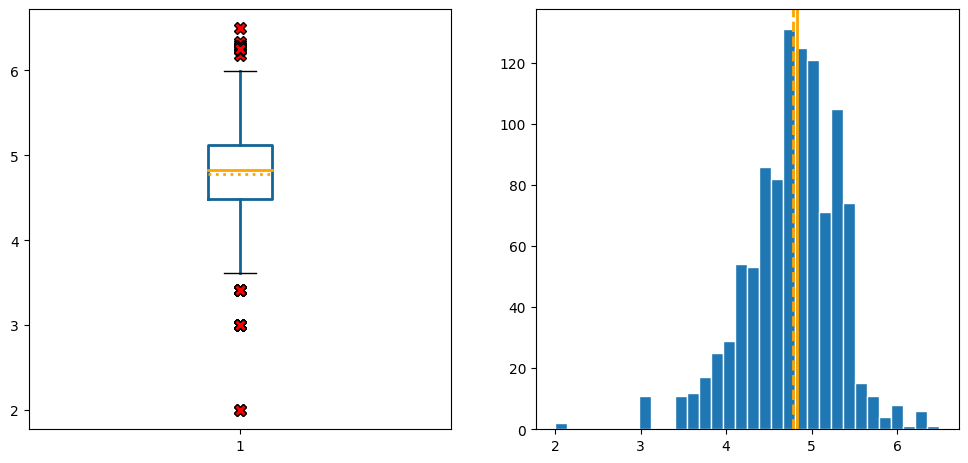


------------------------------------------------------------------------------------------
Atributo: J_Dz(e) , Type: float64


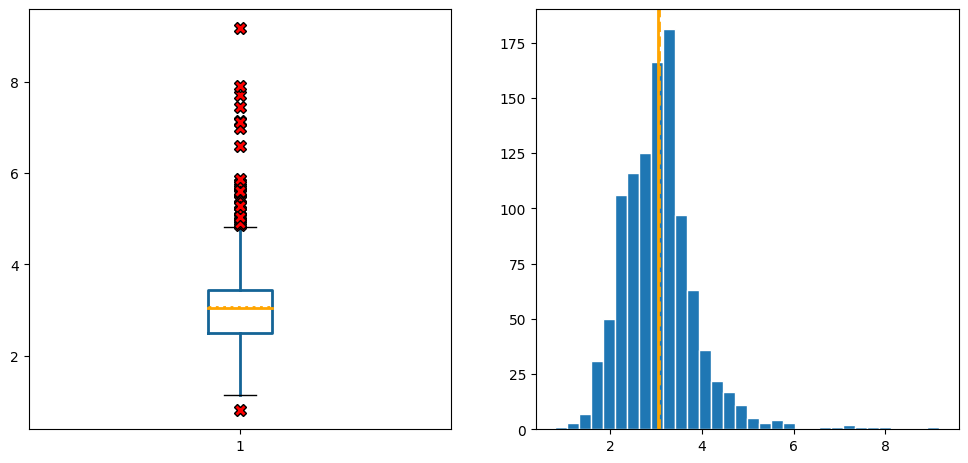


------------------------------------------------------------------------------------------
Atributo: nHM , Type: int64


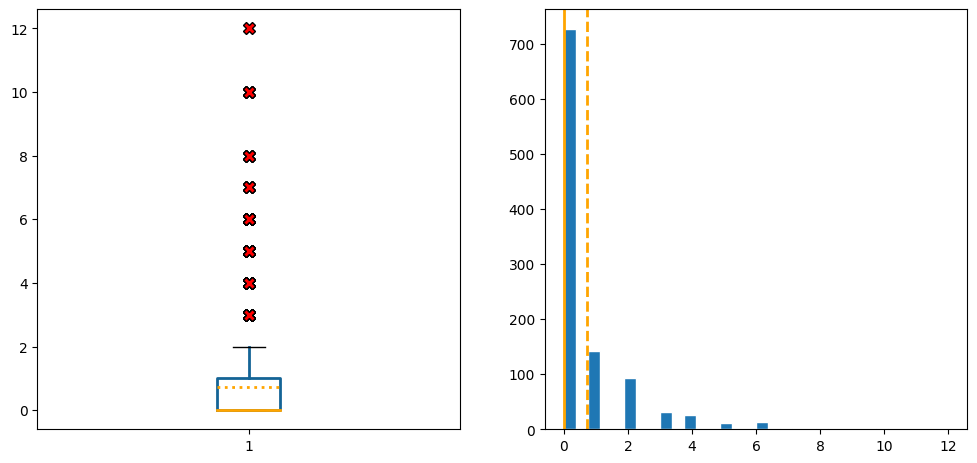


------------------------------------------------------------------------------------------
Atributo: F01[N-N] , Type: int64


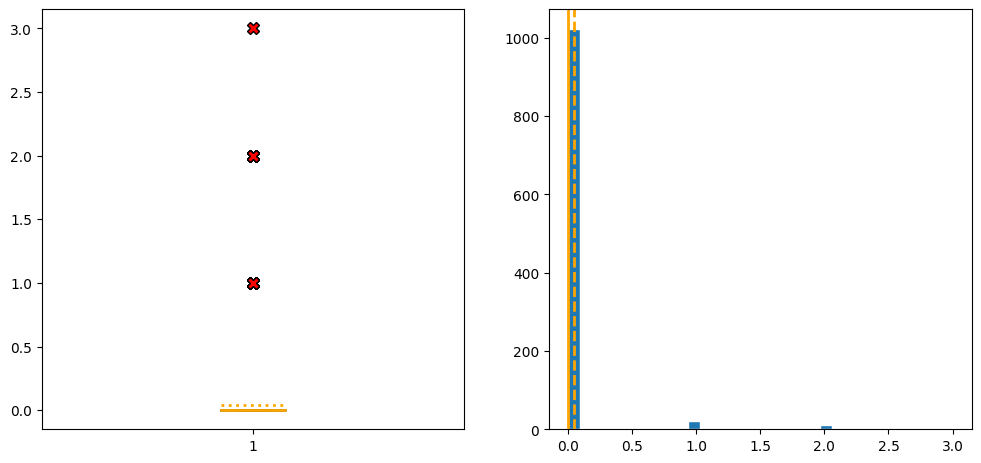


------------------------------------------------------------------------------------------
Atributo: F04[C-N] , Type: int64


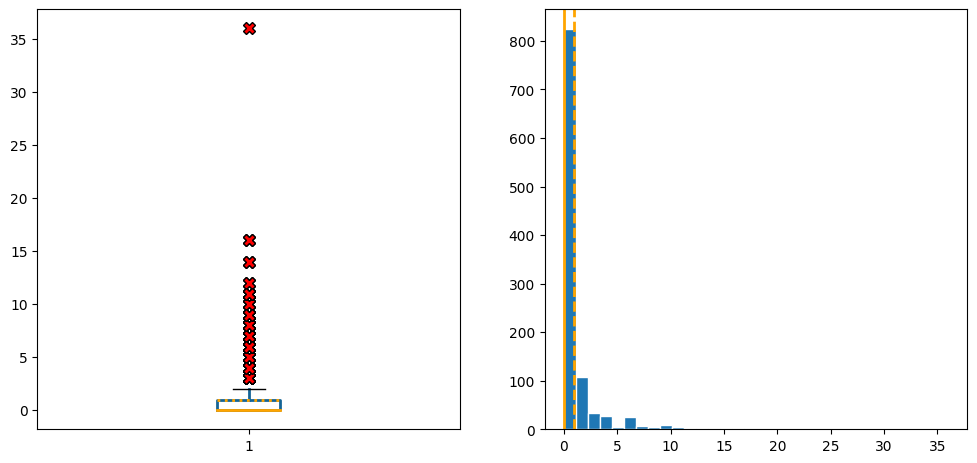


------------------------------------------------------------------------------------------
Atributo: NssssC , Type: int64


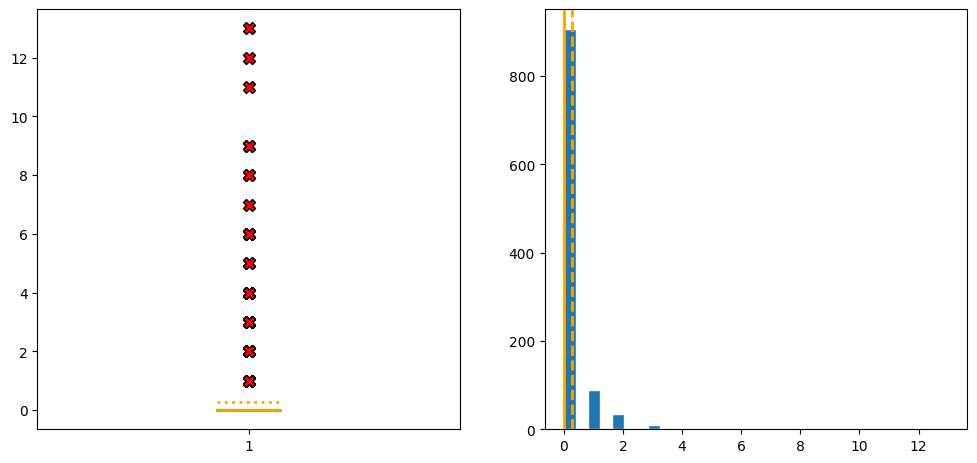


------------------------------------------------------------------------------------------
Atributo: nCb- , Type: int64


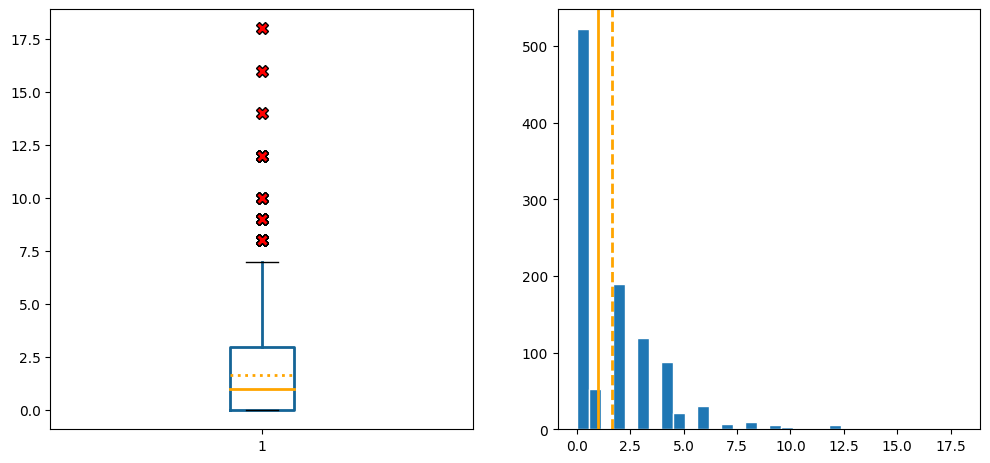


------------------------------------------------------------------------------------------
Atributo: C% , Type: float64


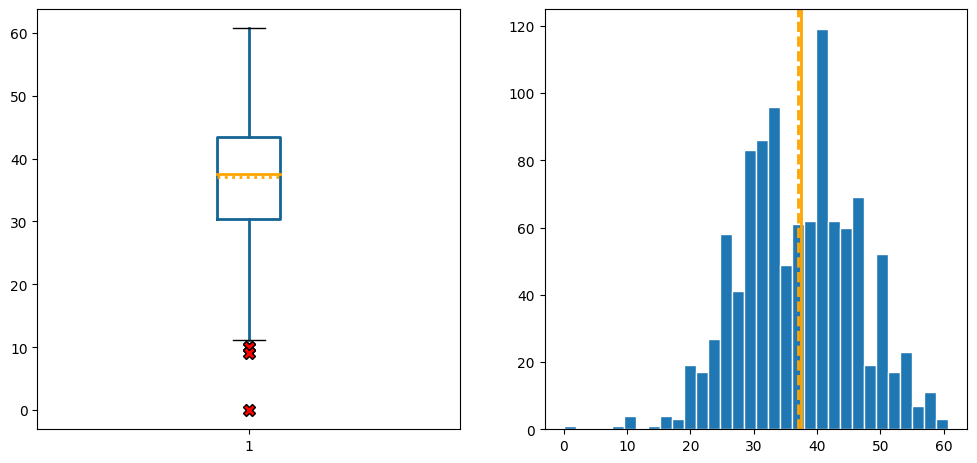


------------------------------------------------------------------------------------------
Atributo: nCp , Type: int64


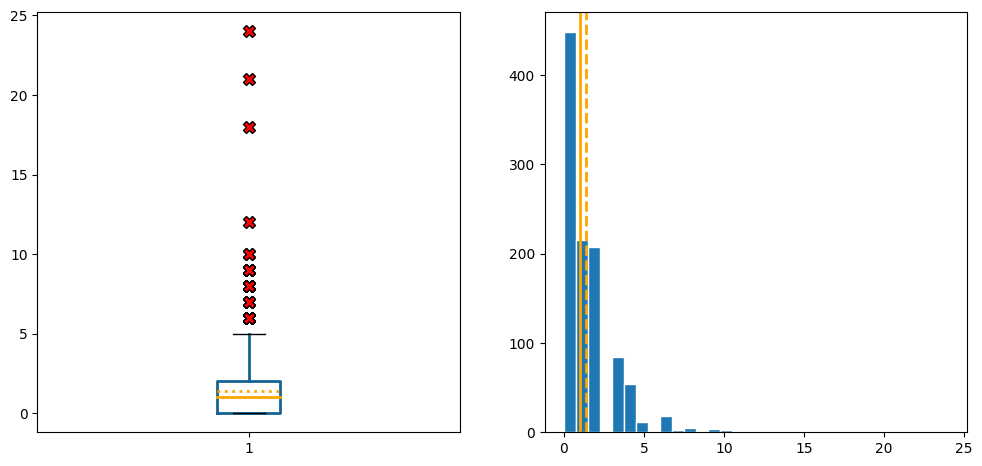


------------------------------------------------------------------------------------------
Atributo: nO , Type: int64


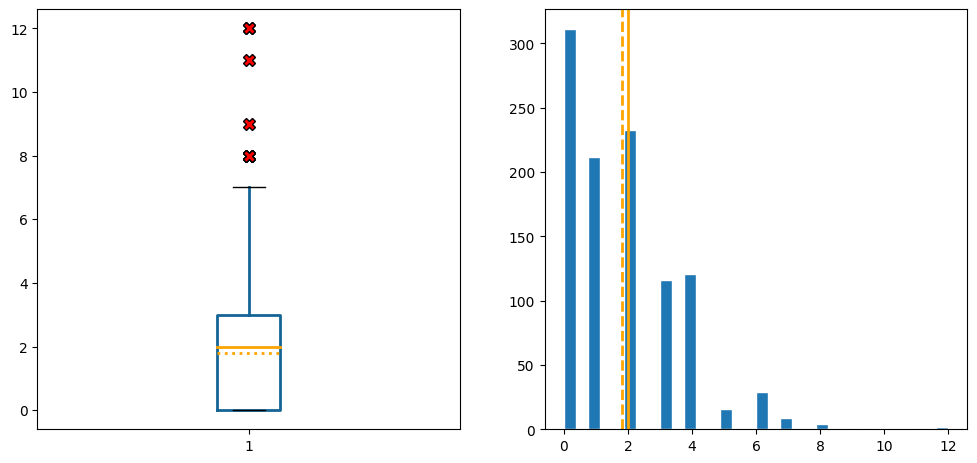


------------------------------------------------------------------------------------------
Atributo: F03[C-N] , Type: int64


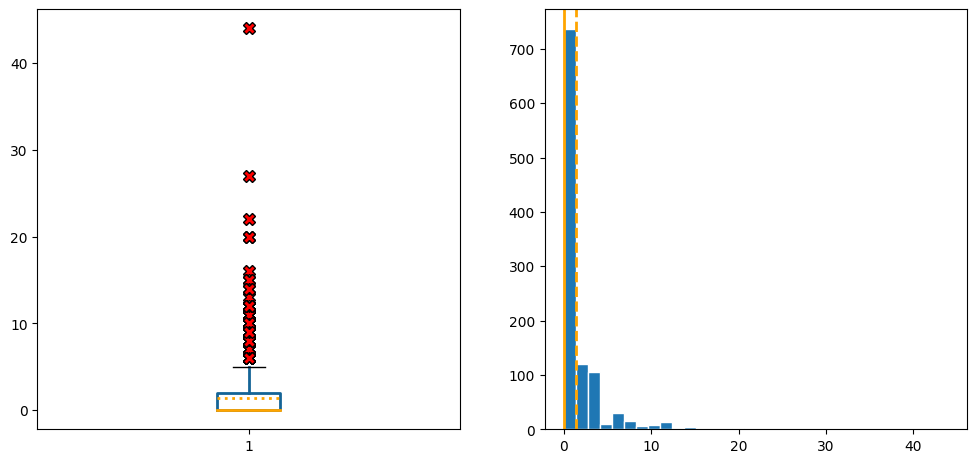


------------------------------------------------------------------------------------------
Atributo: SdssC , Type: float64


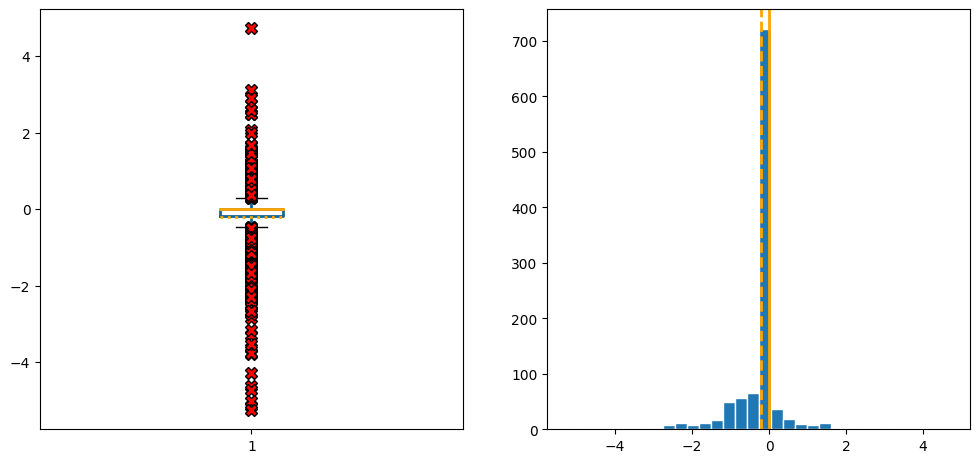


------------------------------------------------------------------------------------------
Atributo: HyWi_B(m) , Type: float64


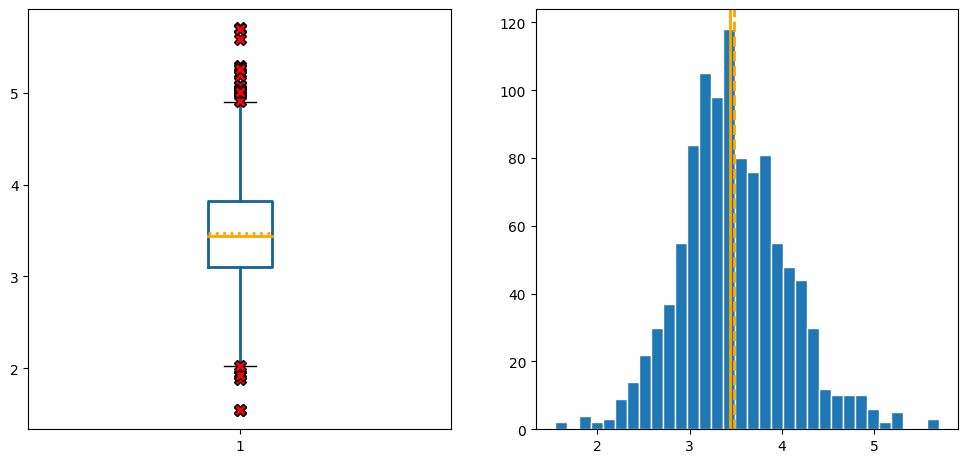


------------------------------------------------------------------------------------------
Atributo: LOC , Type: float64


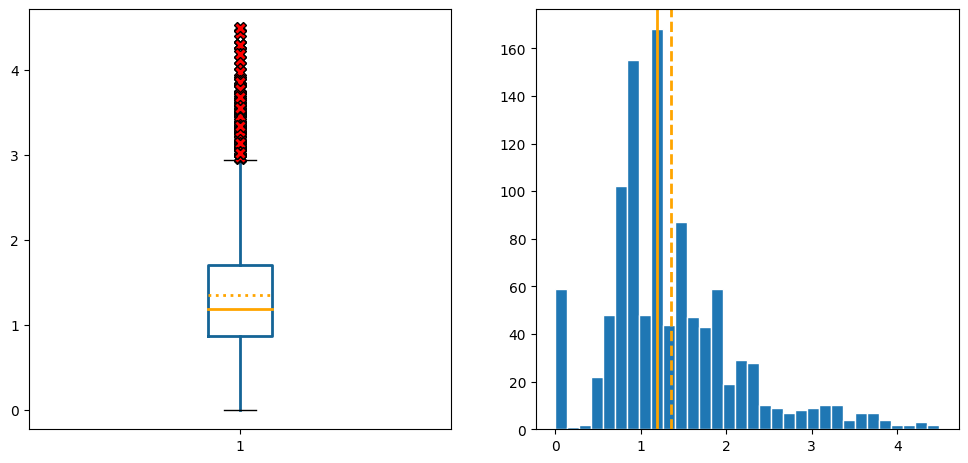


------------------------------------------------------------------------------------------
Atributo: SM6_L , Type: float64


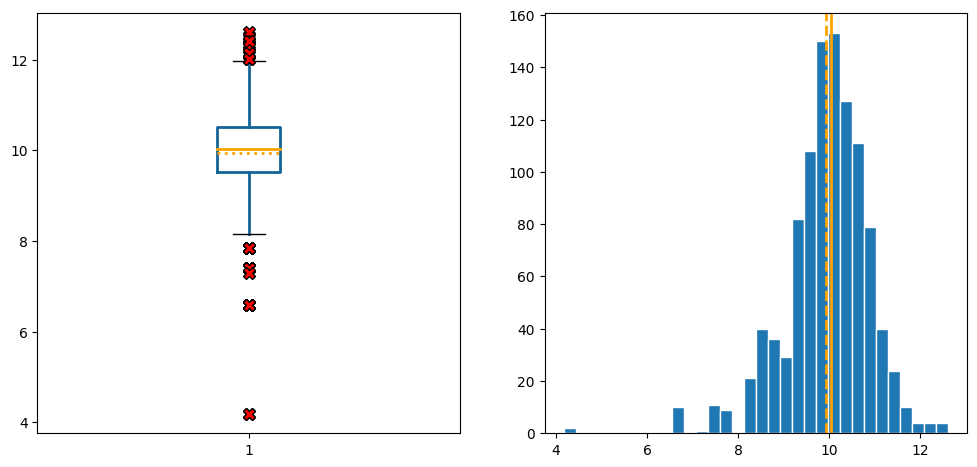


------------------------------------------------------------------------------------------
Atributo: F03[C-O] , Type: int64


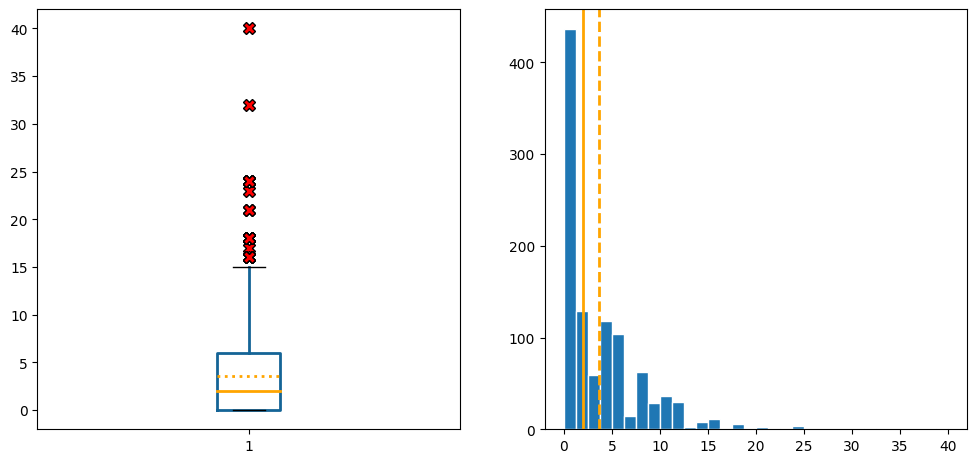


------------------------------------------------------------------------------------------
Atributo: Me , Type: float64


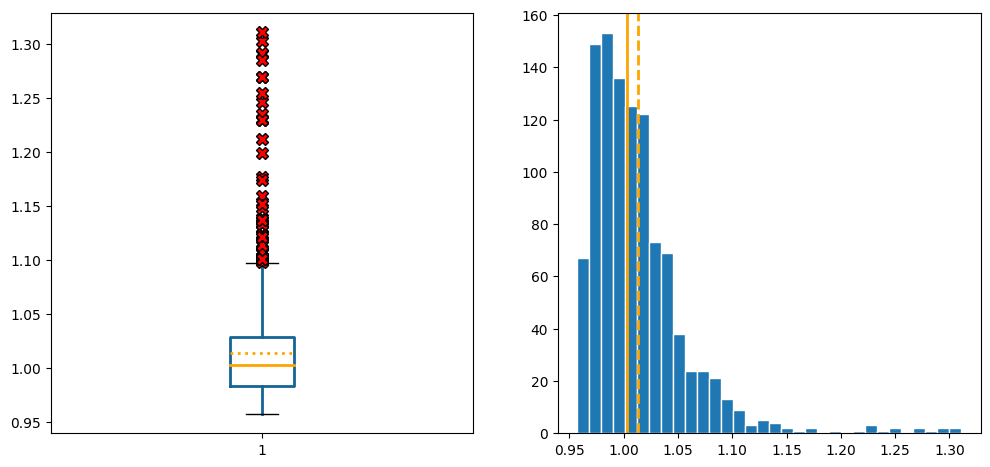


------------------------------------------------------------------------------------------
Atributo: Mi , Type: float64


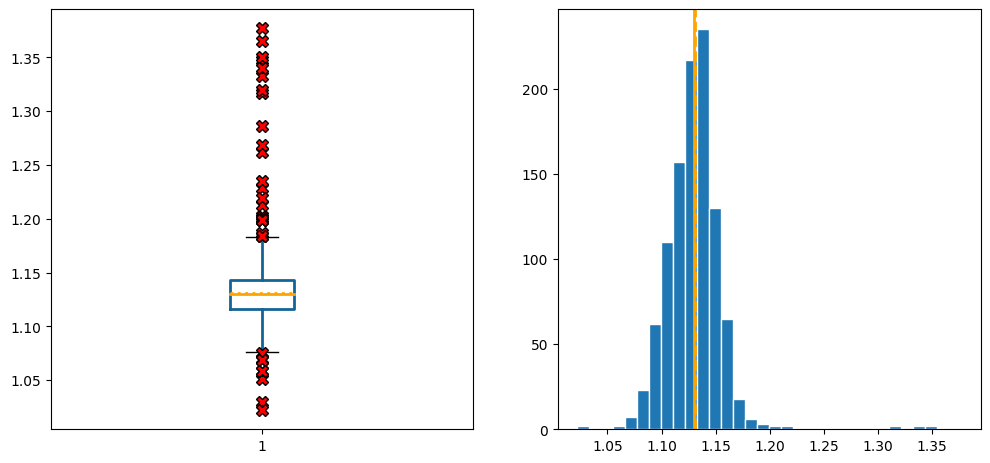


------------------------------------------------------------------------------------------
Atributo: nN-N , Type: int64


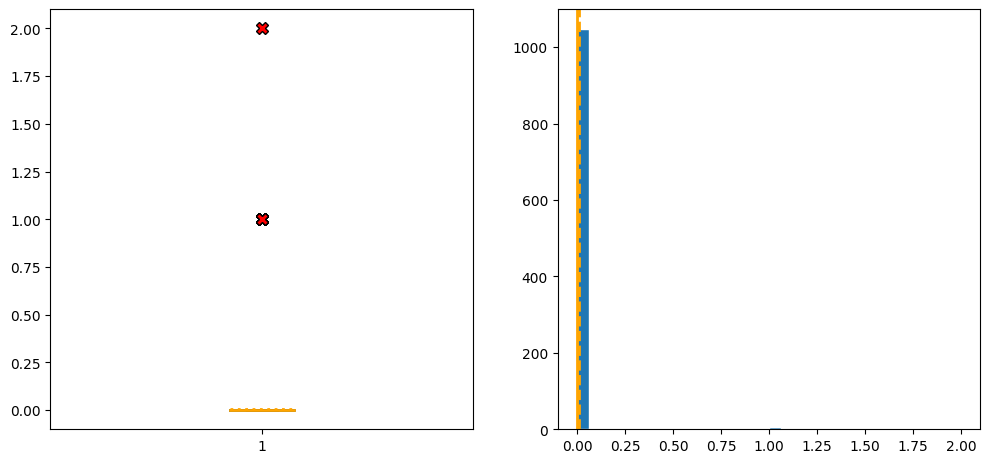


------------------------------------------------------------------------------------------
Atributo: nArNO2 , Type: int64


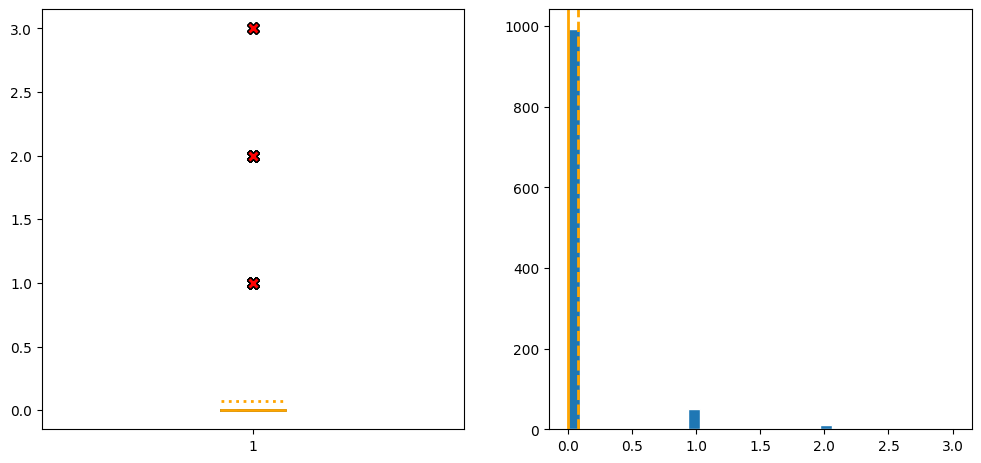


------------------------------------------------------------------------------------------
Atributo: nCRX3 , Type: int64


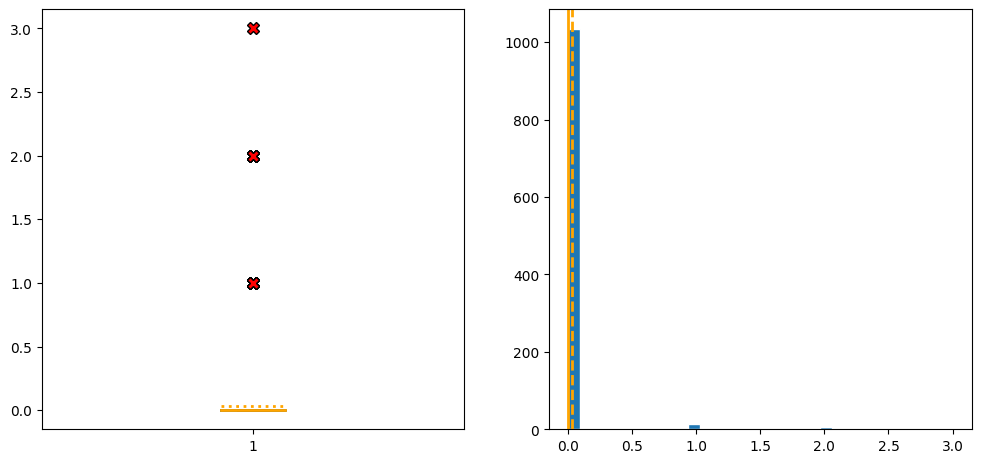


------------------------------------------------------------------------------------------
Atributo: SpPosA_B(p) , Type: float64


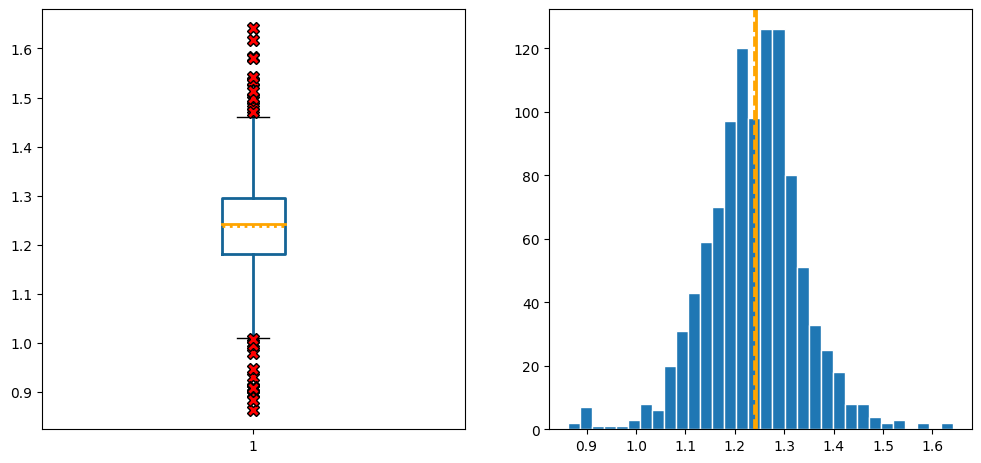


------------------------------------------------------------------------------------------
Atributo: nCIR , Type: int64


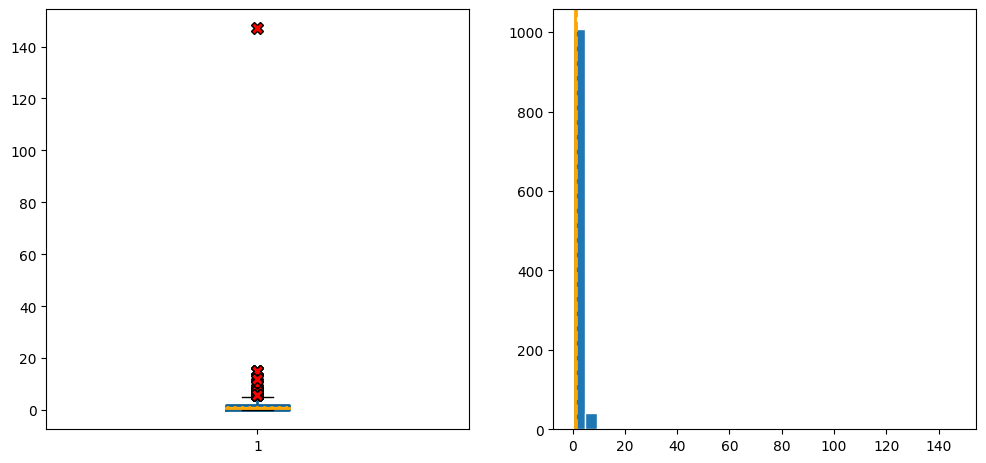


------------------------------------------------------------------------------------------
Atributo: B01[C-Br] , Type: int64


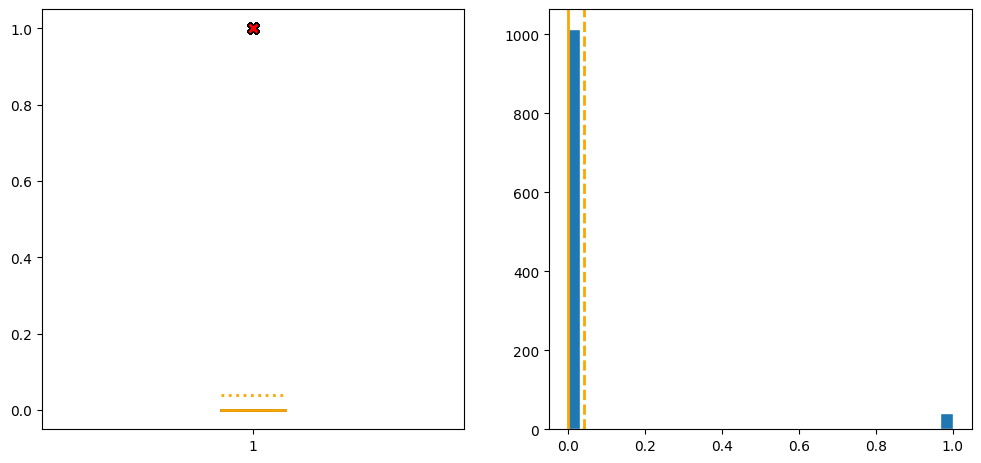


------------------------------------------------------------------------------------------
Atributo: B03[C-Cl] , Type: int64


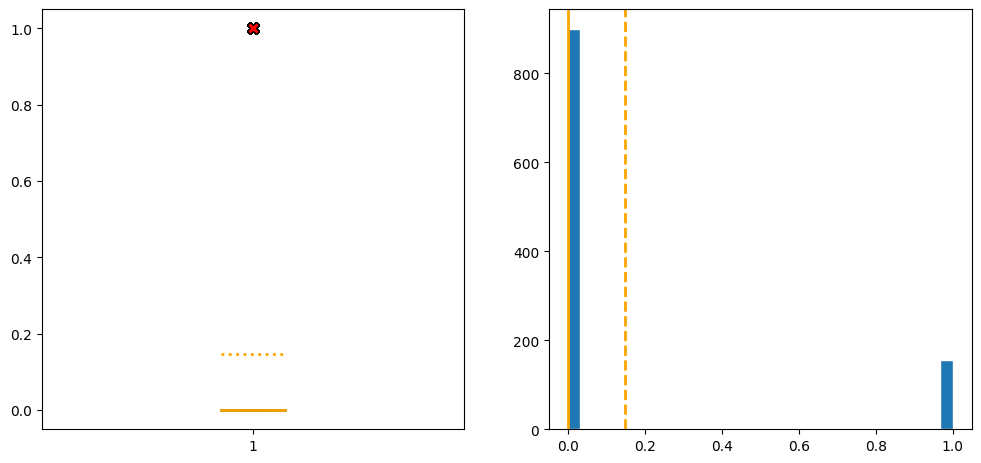


------------------------------------------------------------------------------------------
Atributo: N-073 , Type: int64


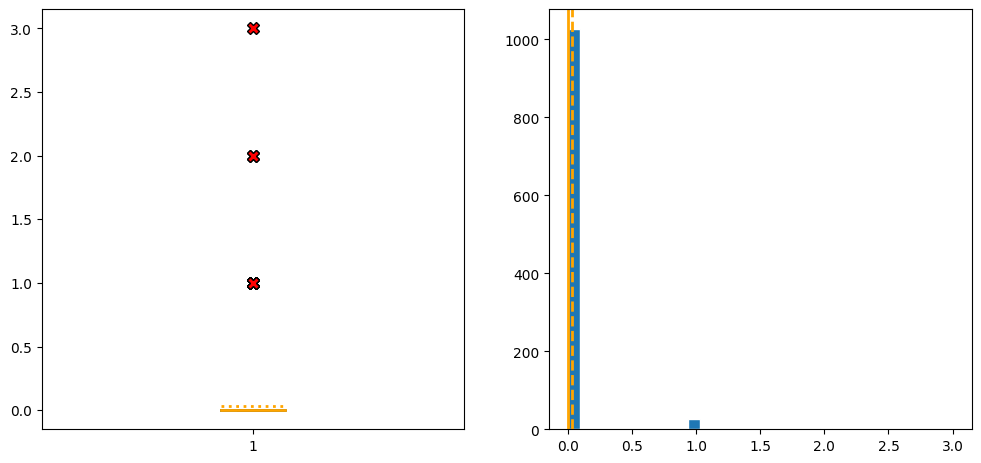


------------------------------------------------------------------------------------------
Atributo: SpMax_A , Type: float64


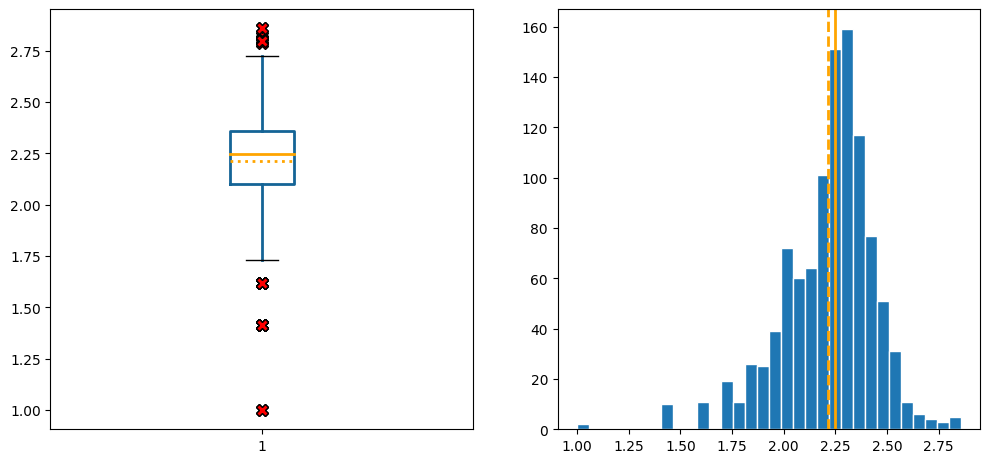


------------------------------------------------------------------------------------------
Atributo: Psi_i_1d , Type: float64


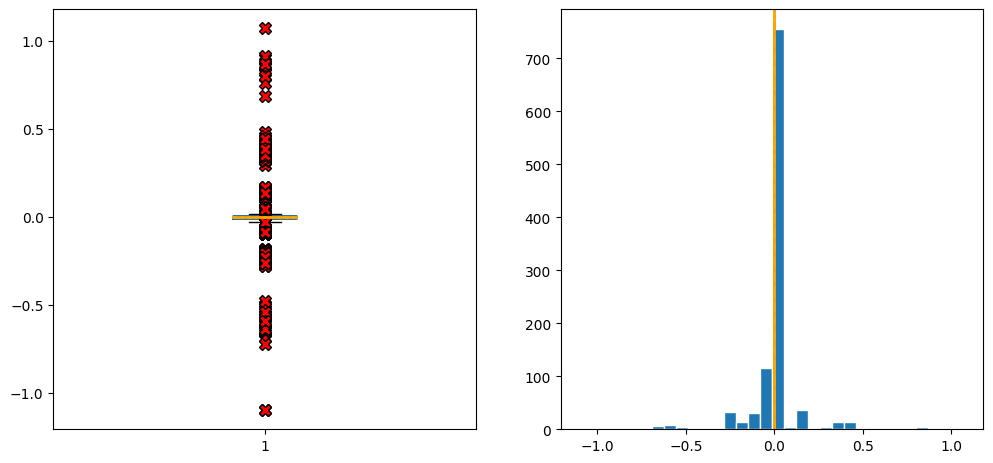


------------------------------------------------------------------------------------------
Atributo: B04[C-Br] , Type: int64


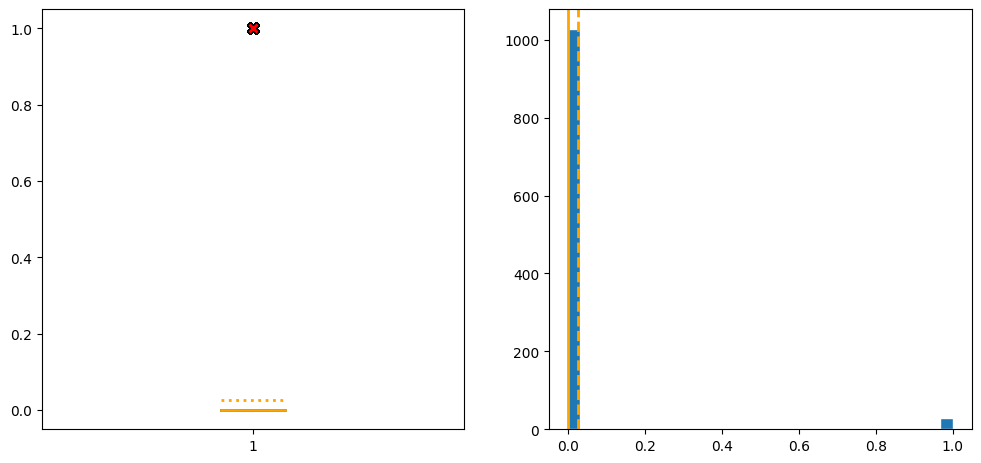


------------------------------------------------------------------------------------------
Atributo: SdO , Type: float64


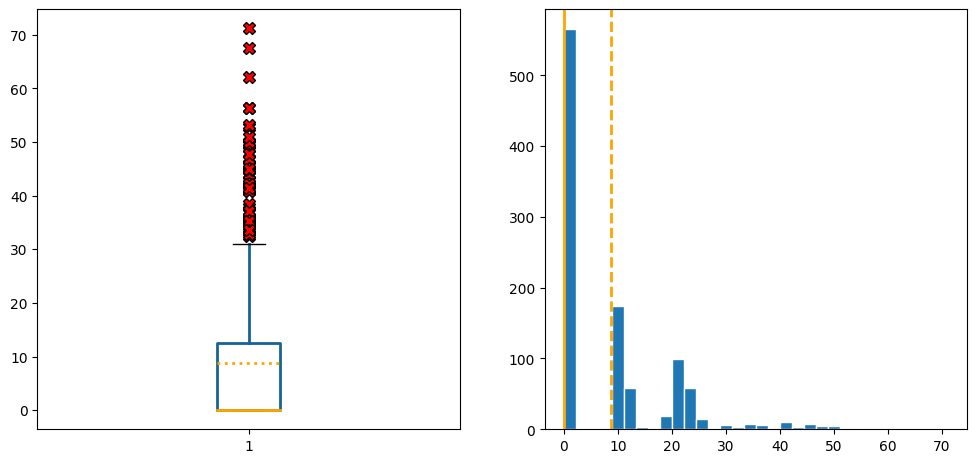


------------------------------------------------------------------------------------------
Atributo: TI2_L , Type: float64


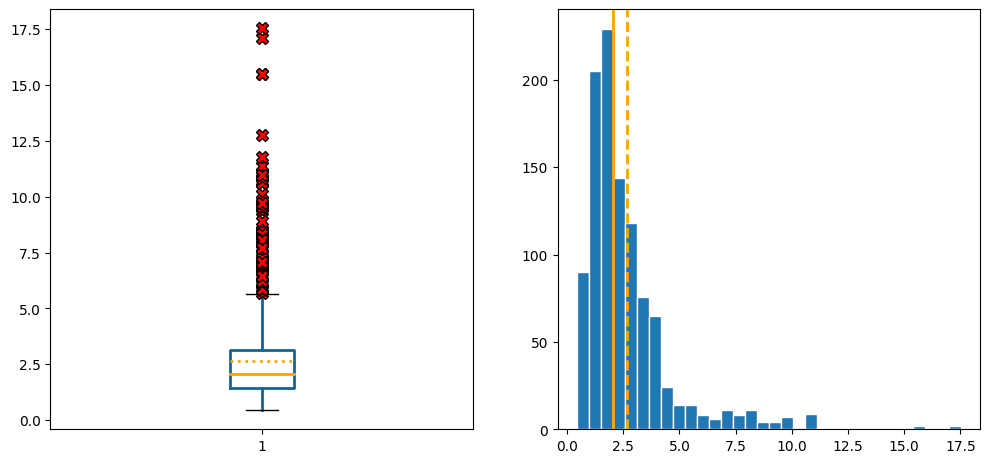


------------------------------------------------------------------------------------------
Atributo: nCrt , Type: int64


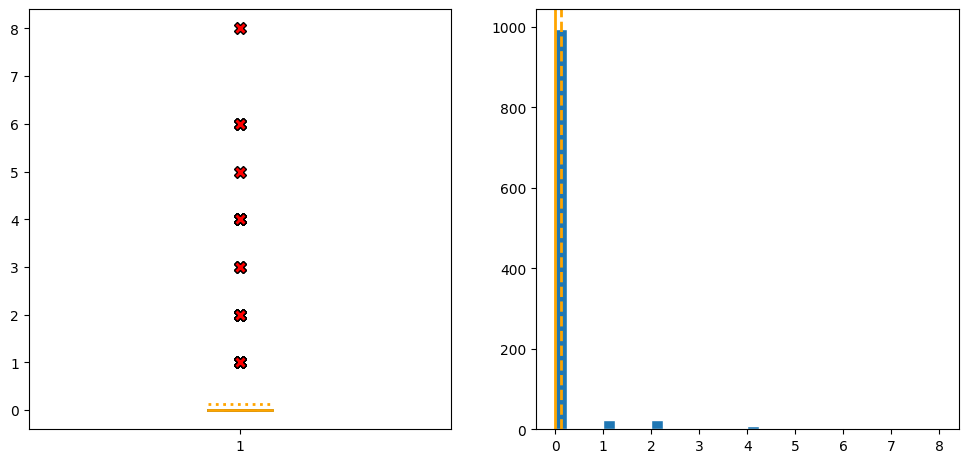


------------------------------------------------------------------------------------------
Atributo: C-026 , Type: int64


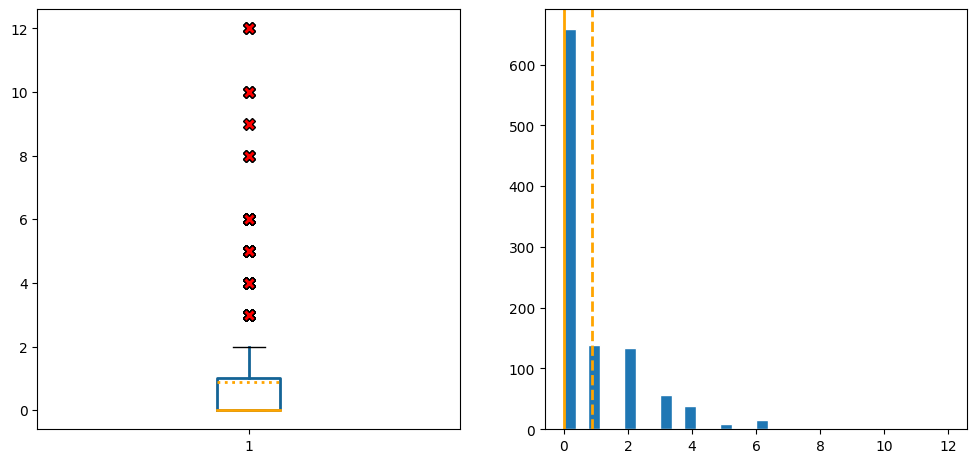


------------------------------------------------------------------------------------------
Atributo: F02[C-N] , Type: int64


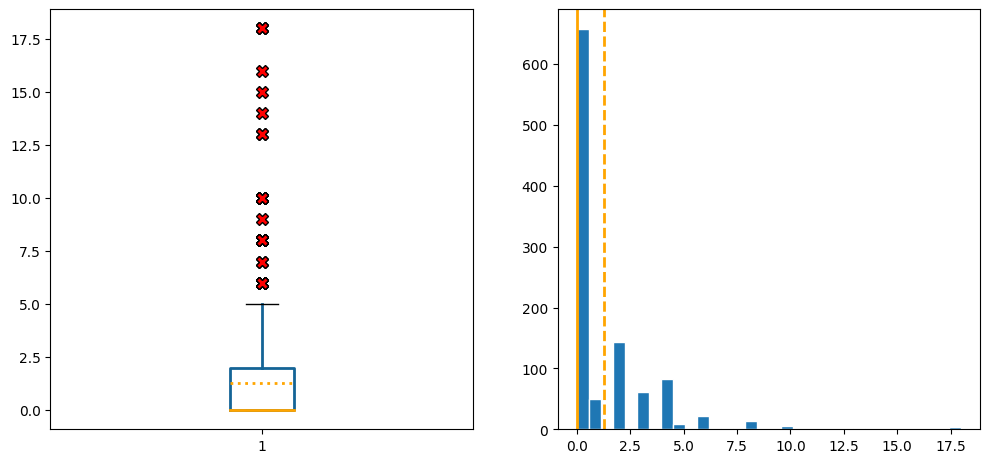


------------------------------------------------------------------------------------------
Atributo: nHDon , Type: int64


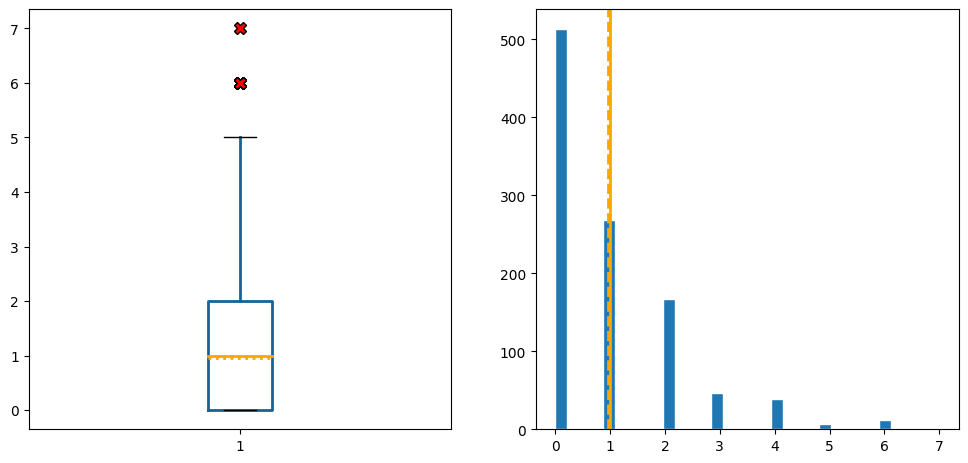


------------------------------------------------------------------------------------------
Atributo: SpMax_B(m) , Type: float64


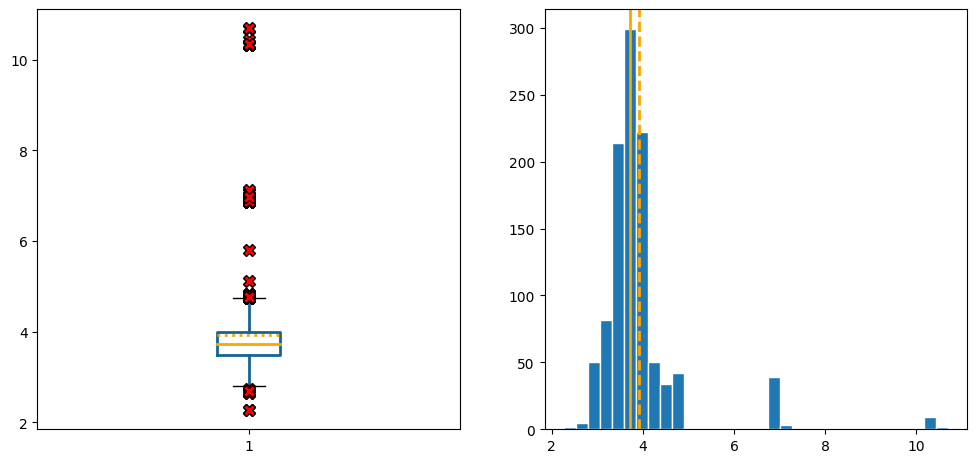


------------------------------------------------------------------------------------------
Atributo: Psi_i_A , Type: float64


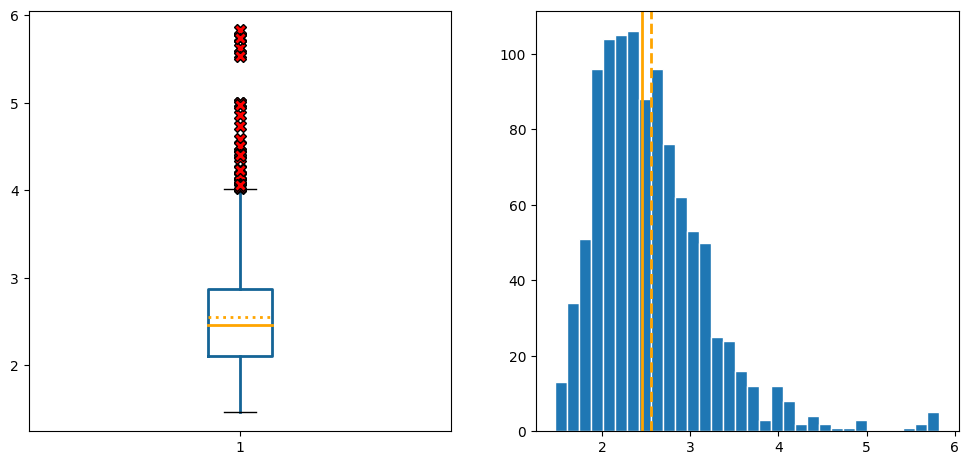


------------------------------------------------------------------------------------------
Atributo: nN , Type: int64


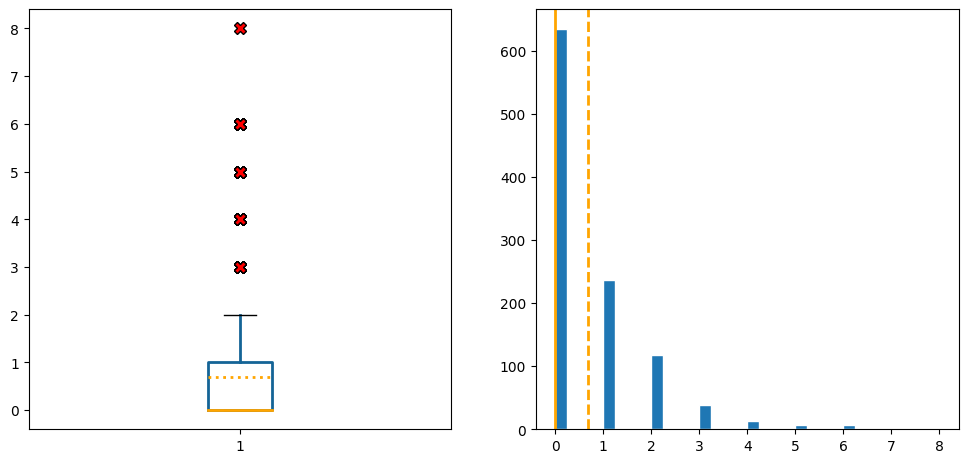


------------------------------------------------------------------------------------------
Atributo: SM6_B(m) , Type: float64


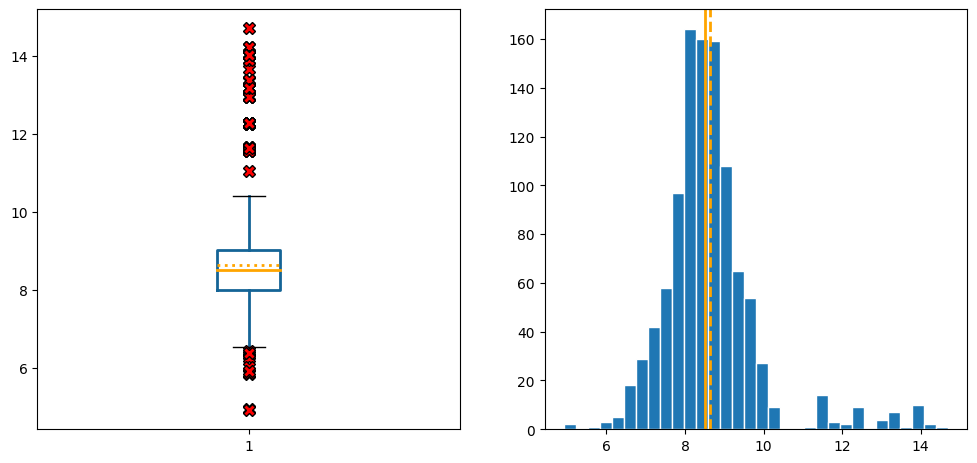


------------------------------------------------------------------------------------------
Atributo: nArCOOR , Type: int64


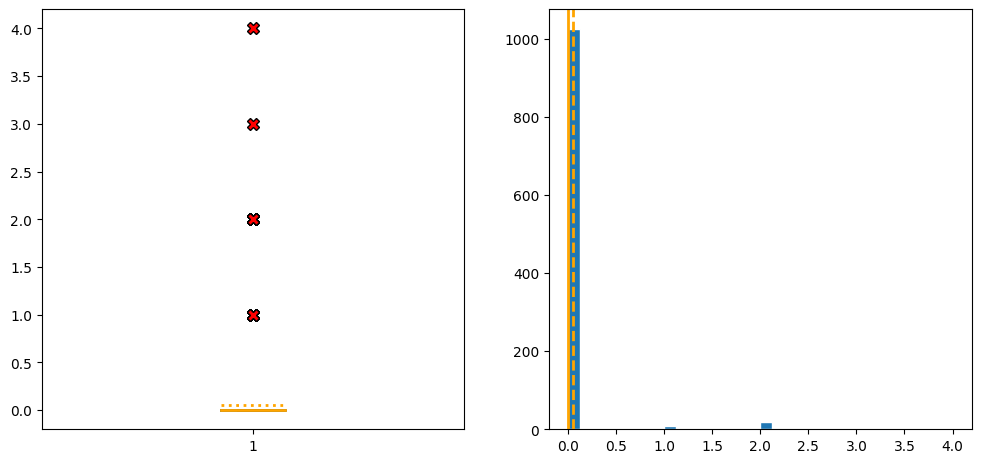


------------------------------------------------------------------------------------------
Atributo: nX , Type: int64


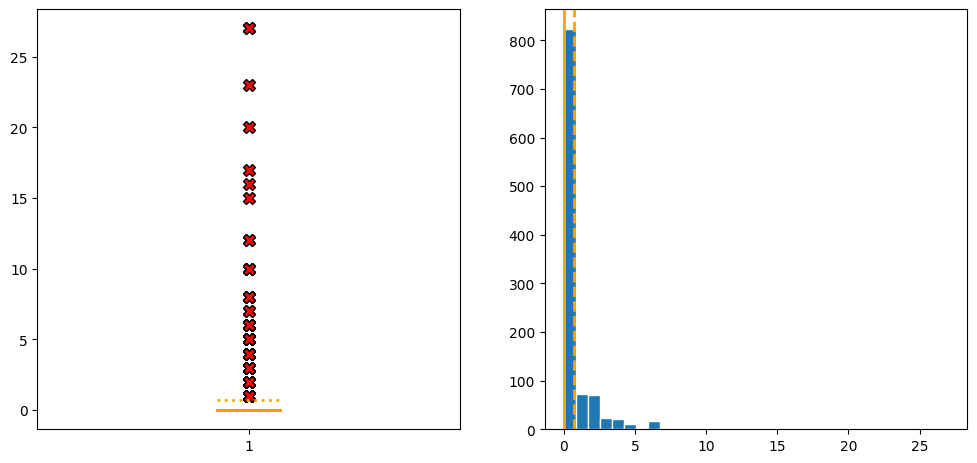


------------------------------------------------------------------------------------------
Atributo: experimental class , Type: object
Número de atributos exclusivos: 2
['RB', 'NRB']

un_dataframe.groupby('experimental class').size()
 experimental class
NRB    699
RB     356
dtype: int64

------------------------------------------------------------------------------------------


In [60]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
from pandas.api.types import is_string_dtype, is_numeric_dtype

NMR_MAX_ATRIBUTOS_CARTAZES = 25

# Criando um box whisker ou uma lista de valores possíveis
# para cada atributo ou coluna em uma tabela de dados

# Propriedades para alterar o estilo das caixas de whisker
box_props=dict(color='#146496',linestyle='solid', linewidth=2, )
anomalias_props=dict(color='red', marker='X', markerfacecolor=None, markersize=8, linewidth=4)
mediana_props=dict(color='orange', linestyle='solid', linewidth=2)
media_props=dict(color='orange', marker=None, markeredgecolor=None, linestyle='dotted', linewidth=2)
caixa_props=dict(color='#146496', linewidth=2)

def examin_distribuicao_atributos(um_dataframe):
    for atributo in um_dataframe.columns:
        # Checando o type de atributo
        print("-"*90)
        print("Atributo:",atributo,", Type:",um_dataframe.dtypes[atributo])
        # Se for um atributo categórico, liste todos os valores possíveis
        if is_string_dtype(um_dataframe[atributo]):
            atributos_uniques = list(um_dataframe[atributo].unique())
            print("Número de atributos exclusivos:",len(atributos_uniques))
            if len(atributos_uniques) > NMR_MAX_ATRIBUTOS_CARTAZES:
                print("Visualização de " + str(NMR_MAX_ATRIBUTOS_CARTAZES) + " Primeiros valores:")
                print(atributos_uniques[:NMR_MAX_ATRIBUTOS_CARTAZES])
            else:
                print(atributos_uniques)
                print("\nun_dataframe.groupby('"+atributo+"').size()\n",um_dataframe.groupby(atributo).size())
        if is_numeric_dtype(um_dataframe[atributo]):
            fig = plt.figure(figsize=(12,12))
            plt.subplot(2,2,1)
            plt.boxplot(um_dataframe[atributo],
                        meanline=True,showmeans=True,
                        boxprops=box_props,
                        flierprops=anomalias_props,
                        medianprops=mediana_props,
                        meanprops=media_props,
                        whiskerprops=caixa_props,
                       )
            plt.subplot(2,2,2)
            plt.hist(um_dataframe[atributo],
                     edgecolor='white',
                     linewidth=1.0,
                     bins=round(len(um_dataframe[atributo])**0.5))
            plt.axvline(um_dataframe[atributo].mean(),
                        color='orange',
                        linestyle='dashed',
                        linewidth=2)
            plt.axvline(um_dataframe[atributo].median(),
                        color='orange',
                        linestyle='solid',
                        linewidth=2)
        plt.show()
        print()
    print("-"*90)

examin_distribuicao_atributos(dados_df)

###  Amostragem - função Pandas Dataframe `.sample()`

Usando a função `.sample()`, selecionei aleatoriamente 500 cópias dos dados.

O parâmetro `random_state` definido arbitrariamente como 42 garante que a amostragem seja reproduzível.
<hr/>
Nota sobre a cultura: <a ref="https://fr.wikipedia.org/wiki/42_(nombre)#Fiction">42 é a resposta para a grande pergunta em 'O Guia do Mochileiro das Galáxias'</a>.

In [59]:
# Abaixo, procedemos à impressão de 12 exemplares do
# dados de treinamento. O parâmetro 'random_state' definido
# arbitrariamente para 42 garante que a amostragem é reprodutível
dados_df.sample(n= 500, random_state=42)

,SpMax_L,J_Dz(e),nHM,F01[N-N],F04[C-N],NssssC,nCb-,C%,nCp,nO,...,C-026,F02[C-N],nHDon,SpMax_B(m),Psi_i_A,nN,SM6_B(m),nArCOOR,nX,experimental class
260,4.414,2.1543,0,0,1,0,0,30.0,0,0,...,0,2,2,3.143,1.833,1,7.083,0,0,RB
832,3.000,1.7389,1,0,0,0,0,25.0,2,0,...,0,0,0,6.867,2.083,0,11.561,0,1,NRB
846,4.560,4.4123,0,0,0,0,0,33.3,4,4,...,0,0,0,3.542,2.250,0,8.631,0,0,RB
1006,4.973,3.6020,0,0,2,0,3,35.0,0,3,...,3,4,2,3.883,3.042,2,8.639,0,0,NRB
88,4.651,2.7156,0,0,0,0,0,31.3,0,1,...,0,2,0,3.482,2.452,1,7.624,0,0,RB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
675,5.993,1.6650,12,0,0,6,0,42.9,0,0,...,0,0,0,4.416,2.494,0,10.410,0,12,NRB
757,4.170,3.1822,2,0,0,0,0,20.0,0,0,...,0,0,1,4.016,2.611,1,8.452,0,0,NRB
1009,5.777,2.3194,0,0,0,2,0,33.3,3,2,...,0,0,1,3.675,2.097,0,8.164,0,0,NRB
338,4.642,3.1871,0,0,1,0,2,38.9,0,1,...,2,2,2,3.648,2.315,1,8.042,0,0,NRB


### Verificando valores ausentes no DataFrame- função `.isnull()`

Lembrete - Os valores  `nan`, `NaN` => Not a Number, na maioria das vezes denotam valores ausentes.
Por várias razões, dados não recolhidos, irrelevantes, dados mantidos em segredo, erros de entrada, etc.

In [17]:
print("-"*90)
print("Número de valores em falta por atributo (coluna):\n",dados_df.isnull().sum())
print("-"*90)
print("Número total de valores em falta:",dados_df.isnull().sum().sum())
print("-"*90)

------------------------------------------------------------------------------------------
Número de valores em falta por atributo (coluna):
 SpMax_L               0
J_Dz(e)               0
nHM                   0
F01[N-N]              0
F04[C-N]              0
NssssC                0
nCb-                  0
C%                    0
nCp                   0
nO                    0
F03[C-N]              0
SdssC                 0
HyWi_B(m)             0
LOC                   0
SM6_L                 0
F03[C-O]              0
Me                    0
Mi                    0
nN-N                  0
nArNO2                0
nCRX3                 0
SpPosA_B(p)           0
nCIR                  0
B01[C-Br]             0
B03[C-Cl]             0
N-073                 0
SpMax_A               0
Psi_i_1d              0
B04[C-Br]             0
SdO                   0
TI2_L                 0
nCrt                  0
C-026                 0
F02[C-N]              0
nHDon                 0
SpMax_B(m)        

Descobrimos que, no caso do conjunto de dados QSAR, não há valores ausentes, pois trata-se de uma base de dados pré-procesada.

Se houvesse valores em falta, uma vez identificados, seria necessário decidir como lidar com esses valores em falta. Basicamente, temos a escolha entre a sua retirada ou substituição.

### Histograma da distribuição de valor de um atributo

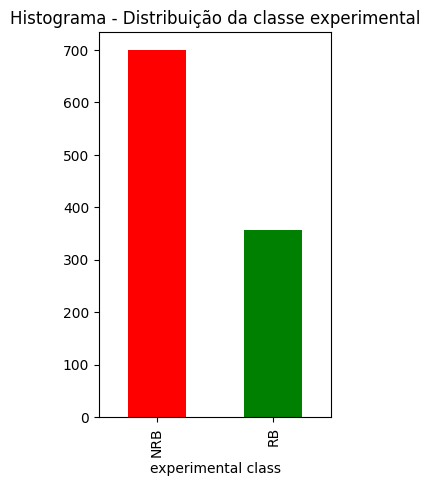

In [18]:
from matplotlib import pyplot as plt
plt.figure(figsize=(3, 5))
(dados_df.groupby(['experimental class']).size()).plot(kind='bar',
                                                 color=['r','g','y'],
                                                 title=u"Histograma - Distribuição da classe experimental")
plt.show()


## Classificação

### Carregando bibliotecas scikit-learn ou `sklearn`

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

print("Bibliotecas Sklearn importadas")

Bibliotecas Sklearn importadas


### Determinação da classe alvo e dos preditores

Procuramos prever a biodegradação a partir dos descritores moleculares dos compostos químicos. A target (ou classe-alvo) será «experimental class» e os preditores (ou atributos-preditores) serão: `RB` e `NRB`.    

Nota terminológica:

* classe-alvo, alvo ou classe, ou previsão, ou variável dependente são termos equivalentes
* preditores, ou atributos ou variáveis independentes são termos equivalentes

#### Separação entre a classe alvo e os atributos preditores

Uma vez que o objetivo é prever a classe alvo (target), ela deve, portanto, ser isolada dos outros atributos preditores para constituir o conjunto de alvos.

Nota: nesse exemplo, os alvos levam os valores: "RB" e "NBR". Outro conjunto contendo os preditores também é criado.

In [21]:
target_df = dados_df['experimental class']

In [22]:
target_df.shape

(1055,)

In [23]:
target_df.sample(n= 500, random_state=42)

260      RB
832     NRB
846      RB
1006    NRB
88       RB
       ... 
675     NRB
757     NRB
1009    NRB
338     NRB
51       RB
Name: experimental class, Length: 500, dtype: object

In [24]:
predict_df = dados_df.drop(['experimental class'],axis='columns')

In [25]:
predict_df.sample(n= 500, random_state=42)

,SpMax_L,J_Dz(e),nHM,F01[N-N],F04[C-N],NssssC,nCb-,C%,nCp,nO,...,nCrt,C-026,F02[C-N],nHDon,SpMax_B(m),Psi_i_A,nN,SM6_B(m),nArCOOR,nX
260,4.414,2.1543,0,0,1,0,0,30.0,0,0,...,0,0,2,2,3.143,1.833,1,7.083,0,0
832,3.000,1.7389,1,0,0,0,0,25.0,2,0,...,0,0,0,0,6.867,2.083,0,11.561,0,1
846,4.560,4.4123,0,0,0,0,0,33.3,4,4,...,0,0,0,0,3.542,2.250,0,8.631,0,0
1006,4.973,3.6020,0,0,2,0,3,35.0,0,3,...,0,3,4,2,3.883,3.042,2,8.639,0,0
88,4.651,2.7156,0,0,0,0,0,31.3,0,1,...,0,0,2,0,3.482,2.452,1,7.624,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
675,5.993,1.6650,12,0,0,6,0,42.9,0,0,...,8,0,0,0,4.416,2.494,0,10.410,0,12
757,4.170,3.1822,2,0,0,0,0,20.0,0,0,...,0,0,0,1,4.016,2.611,1,8.452,0,0
1009,5.777,2.3194,0,0,0,2,0,33.3,3,2,...,3,0,0,1,3.675,2.097,0,8.164,0,0
338,4.642,3.1871,0,0,1,0,2,38.9,0,1,...,0,2,2,2,3.648,2.315,1,8.042,0,0


In [26]:
predict_df.shape

(1055, 41)

### Estabelecendo uma linha de referência

Vamos calcular a percentagem de cada classe alvo com base em estatística descritiva, existem muitas maneiras de conseguir isso.

Este resultado nos dará uma linha de base e um modelo de decisão de regra única (OneR) que consiste em prever os descritores moleculares com base apenas em estatísticas, sem envolver aprendizado de máquina.


In [27]:
# Calcula-se a média `mean()` dos casos em que a classe-alvo corresponde a um determinado Valor.
print("biodegradável pronto (RB):{pourcent: .2f} %".format(pourcent=np.mean(target_df == "RB")*100))
print("não biodegradável pronto (NRB):{pourcent: .2f} %".format(pourcent=np.mean(target_df == "NRB")*100))

biodegradável pronto (RB): 33.74 %
não biodegradável pronto (NRB): 66.26 %


A partir dos resultados acima, verificamos que as nossas duas classes-alvo estão distribuídas desproporcinadamente.

Por tanto, não é viável para este projeto estabelecer uma unica linha de referência para nosso modelo.

* Nota: A ideia do modelo de decisão de regra única (OneR) é simples. simplesmente temos de prever sistematicamente um unico valor da 'experimental class', por exemplo 'NRB' e estatisticamente estaremos certos 1 vez em 2. Esta seria é a referência básica do modelo.

In [28]:
target_df

0        RB
1        RB
2        RB
3        RB
4        RB
       ... 
1050    NRB
1051    NRB
1052    NRB
1053    NRB
1054    NRB
Name: experimental class, Length: 1055, dtype: object

### Preparação de dados para o Scikit-Learn

O Scikit-Learn requer atributos para obter valores numéricos com decimais. Portanto, é necessário converter valores categóricos em valores numéricos. Também não deve faltar nenhum valor nos dados.   

Além disso, o Scikit-Learn espera que os atributos estejam em uma tabela onde cada coluna é um atributo e cada linha uma cópia dos dados (observação ou ponto de dados).

#### Codificação de atributos categóricos - Função Sklearn `LabelEncoder()`

**Nota**: um atributo categórico usa valores de rótulo simbólicos. Por exemplo, o atributo "color" pode ter os valores "vermelho", "verde" e "azul". Algoritmos de aprendizado de máquina, incluindo redes neurais profundas, exigem que as variáveis de entrada sejam números. Portanto, é necessário codificar os dados categóricos em númericos antes de usá-los para treinar um modelo.

In [29]:
from sklearn.preprocessing import LabelEncoder

encodeur = LabelEncoder()
encodeur.fit(target_df.values)
target = encodeur.transform(target_df)
# Exibindo os dez principais alvos
target [:10]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

#### Convertendo dados em número com decimais

Idealmente, todos os valores de atributos devem ser convertidos em um número com casas decimais normalizadas entre 0 e 1 porque alguns algoritmos Scikit-Learn são sensíveis ao tamanho de diferentes atributos.

Existem funções no Scikit-Learn para resolver isso.




In [31]:
predict = predict_df.values

### Divisão em dados de treinamento e teste - Função Sklearn `train_test_split()`.

Reteremos alguns dos dados em um conjunto de dados de teste que o algoritmo não verá e usaremos esses dados para ter uma ideia de como o modelo funciona em dados desconhecidos.

Vamos dividir o conjunto de dados em dois, dos quais tipicamente 80% serão usados para treinamento, avaliação e seleção entre nossos modelos, e 20% serão mantidos como o conjunto de dados de teste.

<ul>
    <li>Como primeiro passo, compartilharemos os dados entre um conjunto de dados de treinamento e um conjunto de dados de teste. Os dados de teste serão isolados e retidos para avaliar o desempenho final dos algoritmos em dados novos. Isso é chamado de medida de erro de generalização.</li>
</ul>

**Nota**: O parâmetro de estratificação `stratify` (estratificar) garante que a atribuição aleatória dos dados de `train_test_split()` respeita a proporção de valores na amostra fornecida para `stratify`. Isso é especialmente importante para pequenos conjuntos de dados, onde a alocação aleatória de dados pode retornar resultados muito diferentes de uma vez para outra.

Por exemplo, se a classe de destino `target_df` é um atributo categórico com 2 ou mais valores igualmente distribuídos( o que não é o caso deste projeto), a atribuição `stratify=target_df` garantirá que a randomização respeite essa proporção. Obviamente, se não houver randomização e o parâmetro `shuffle=False`, então `stratify=None`.

In [51]:
from sklearn.model_selection import train_test_split

# O conjunto de dados de teste contém 20% dos dados iniciais
# Nota: esta proporção pode variar dependendo do tamanho do conjunto de dados
test_ratio = 0.20

# Isolar dados de teste
predict_train, predict_test, target_train, target_test = train_test_split(predict,
                                                                              target,
                                                                              test_size=test_ratio,
                                                                              stratify=None,
                                                                              random_state=42)

In [57]:
print("Dimensões dos preditores de treinamento:",predict_train.shape)
print("Dimensões de preditores de teste:",predict_test.shape)
print("Dimensões dos alvo de treinamento:",target_train.shape)
print("Dimensões dos alvo de teste:",target_test.shape)

Dimensões dos preditores de treinamento: (844, 41)
Dimensões de preditores de teste: (211, 41)
Dimensões dos alvo de treinamento: (844,)
Dimensões dos alvo de teste: (211,)


In [53]:
target_train, target_test

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
        1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
        0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
        0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
        0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
        0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
        0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
        0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
        0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
        0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
        0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 

### Escolha de diferentes algoritmos de classificação

* #### Regressão logística (sic) ou classificação logística

A regressão logística é mal nomeada, porque não é uma regressão onde um número é previsto, mas uma classificação entre classes-alvo. Na verdade, a regressão logística que calcula uma probabilidade torna-se a classificação logística, um algoritmo de classificação, quando combinada com uma regra de decisão. Se a probabilidade for maior ou igual a 0,5 o resultado é 1, se o resultado for menor que 0,5, o resultado é 0.

O cálculo de probabilidade é baseado na função $\large{logística(x) = \frac{L}{1+Ce^{-k(x-x_0}}}$ cuja função  $\large sigmoïde(x)=\frac{1}{1+e^{-x}}$ é um caso especial com $L=1, C=1, k=1, x_0=0$. Note de passagem que o sigmoide é usado em redes neurais.

Aqui utilizaremos a classificação logística multinomial que é uma extensão da classificação logística para situações com três ou mais classes alvo.

A classificação logística é um algoritmo simples e robusto com bom poder de generalização.

* #### Tree-based set algorithms
Nos últimos anos, tem sido observado em competições <a href="https://fr.wikipedia.org/wiki/Kaggle" target="_blank">Kaggle</a> e artigos científicos que os melhores algoritmos para processar conjuntos de dados pequenos (#exemplaires <100.000) e pequenos (#atributos <5.000) são muitas vezes conjuntos de algoritmos de Decision trees.


Estes são dois chamados algoritmos de aprendizagem de conjunto, onde cada subamostra corresponde a um modelo distinto representado por um <a href="https://en.wikipedia.org/wiki/Decision_tree_learning" target="_blank">Decision trees</a>.


O Scikit-Learn oferece a possibilidade de desenvolver modelos não lineares baseados em árvores que são conhecidos por terem um bom desempenho em situações em que o número de atributos não é muito grande (menos de 5.000). Vamos experimentar com florestas aleatórias (random forests) e árvores impulsionadoras de gradiente(gradient boosting trees).

**Nota**: Para grandes conjuntos de dados (#exemplares >100.000), incluindo pelo menos 5.000 por destino, e para dados de alta dimensão (#atributos >5.000), as redes neurais profundas geralmente têm um desempenho melhor.

**Fonte**: https://towardsdatascience.com/https-medium-com-vishalmorde-xgboost-algorithm-long-she-may-rein-edd9f99be63d

* #### Random forest

O classificador aleatório de florestas, também conhecido como Decision tree forest, foi formalmente proposto em 2001 por Leo Breiman e Adèle Cutler. Faz parte do conjunto de técnicas de aprendizagem que realizam treinamento em várias árvores de decisão treinadas em subconjuntos de dados ligeiramente diferentes.

O Random forest é baseada na agregação por agregação de bootstrap. Normalmente, definir a nova amostragem ajuda a reduzir a variância e o sobreajuste. O algoritmo de floresta aleatória é uma extensão amplamente utilizada da reamostragem de conjuntos.  

O resultado será obtido pela média de uma regressão (previsão de um número) ou por maioria de votos no caso de uma classificação (previsão de uma classe alvo).

* #### Doped gradient axes - XGBoost

As árvores de aumento de gradiente são baseadas em um metaalgoritmo de aprendizagem definido que agrega iterativamente classificadores fracos criados e ponderados de acordo com seu desempenho para formar um classificador final forte (maior capacidade, viés reduzido), neste caso árvores de decisão.

Por iterações sucessivas, classificadores baixos (baixa capacidade, alto viés), na forma de pequenas árvores de decisão, são adicionados um a um a um conjunto de árvores usando uma função de custo otimizado de descida gradiente.


Ao adicionar um classificador fraco, a ponderação dos dados da amostra (ou pontos de dados) é reajustada (reponderada) onde exemplos mal classificados ganham peso e exemplos bem classificados perdem peso. Assim, um novo classificador fraco se concentrará mais em exemplos que são classificados incorretamente por classificadores fracos anteriores para corrigir sua influência. Lembre-se de que um classificador fraco é um classificador capaz de distinguir duas classes pelo menos tão bem quanto o acaso permite (portanto, não está errado mais de uma vez em duas em média, se a distribuição de classes for equilibrada). Algoritmos muito populares aplicam doping de gradiente, como o inevitável XGBoost e o AdaBoost (abreviação do termo adaptive boosting), que agora tem importância principalmente histórica.

**Nota**: Para uma maior generalidade, a palavra "classificador" pode ser substituída por "modelo".

XGBoost é um bom exemplo, XGBoost para Extreme Gradient Boosting.

### Cross-validation (Validação cruzada) - função Sklearn `StratifiedKFold()`

<ul>
    <li>Numa segunda etapa, a busca pelos melhores hiperparâmetros será realizada com os dados de treinamento que envolverão a criação de conjuntos de validação com validação cruzada.</li>
</ul>

Já dividimos aleatoriamente o conjunto de dados em dados de treinamento (80%) e dados de teste em branco (20%) para avaliar o modelo.

A validação cruzada permite comparar modelos e ajustar hiperparâmetros sem exigir um conjunto de validação separado. Isso preserva dados valiosos de treinamento. Especificamente, realizaremos a validação cruzada n-fold.

 Em vez de dividir nossos dados uma vez, começaremos de novo várias vezes e calcularemos as pontuações min, max e média como uma melhor estimativa da pontuação real.


**Fonte**: https://scikit-learn.org/stable/modules/cross_validation.html

### Ferramentas de avaliação de modelos

#### Matriz de confusão

É possível ver os detalhes dos falsos positivos e falsos negativos exibindo a matriz de confusão.


In [54]:
def exiber_matriz_confusao(cm, nomes_rotulos = [u'classe - 0', u'classe - 1'],
                   titulo=u'Matriz de confusão'):
#     plt.imshow(cm, interpolação='nearest', cmap=plt.cm.Blues)
    print("\n",cm,"\n")
    plt.imshow(cm, cmap=plt.cm.Blues)
    plt.title(titulo)
    plt.colorbar()

    tick_marks = np.arange(len(nomes_rotulos))
    plt.xticks(tick_marks, nomes_rotulos, rotation=60)
    plt.yticks(tick_marks, nomes_rotulos)
    plt.ylabel(u'Rótulo real')
    plt.xlabel(u'Rótulo previsto')
    # Função de ajuste
    plt.tight_layout()
    plt.show()


 [[7 2 1]
 [2 6 2]] 



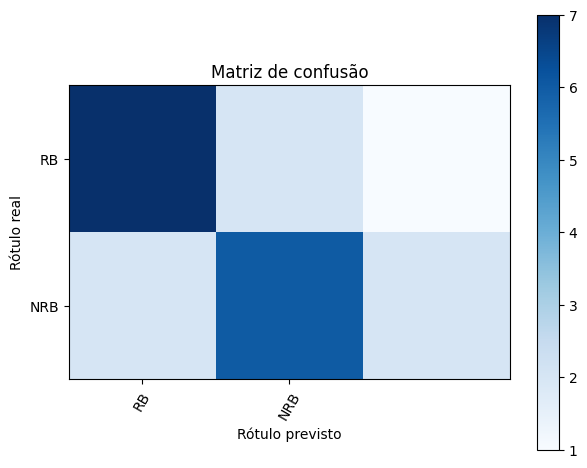

In [55]:
# Testando a função D, exibindo com ds dados fictícios
matriz_confusao = np.array([[7,  2,  1],[ 2,  6,  2]])
nomes_rotulos = ['RB','NRB']
exiber_matriz_confusao(matriz_confusao, nomes_rotulos)

### Outros métodos de avaliação de um modelo de aprendizagem




### Avaliação do modelo com dados de validação

* Defina uma métrica para avaliar o seu modelo;
* Que nível de desempenho você quer?
* Comece com um modelo simples
* Itere até atingir o nível esperado de desempenho:
    * O erro de treinamento é alto?
        * SIM (viés elevado):
            * Experimente um modelo mais complexo
            * Treinar mais tempo
        *NÃO:
            * O erro de validação é alto?
                * SIM (alta variância):
                    * Adicionar dados
                    * Trem por menos tempo (parada antecipada)
                    * Reduzir a complexidade do modelo (regularizar)
                * NÃO (manter tudo funcionando)

### Avaliação final do modelo com dados de teste

Mantive-se alguns dos dados no conjunto de dados de teste que o algoritmo não tocou( que não foram usados na etapa de treinamento). Usaremos esses dados para ter uma ideia de como o modelo está se comportando em dados desconhecidos.

Versão de XGBoost 1.7.6
Treinamento de diferentes modelos...

Resultados da validação cruzada:

>  Classificação logística: 0.863715 (0.022346)


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


>  Random forest: 0.850733 (0.021817)


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


>  Doping gradient trees - XGBoost: 0.860214 (0.017624)

 ****************************************************************************************************

Validação com dados de teste...

>  Classificação logística: - Erro de classificação nos dados de teste: 27
>  Classificação logística- Acurácia: 0.87
Matriz de confusão:


 [[120  16]
 [ 11  64]] 



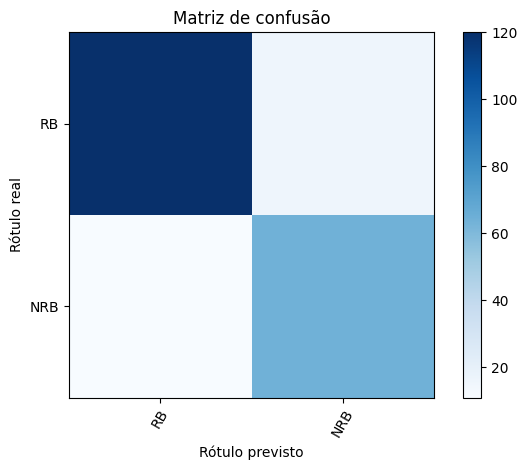


Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.92      0.88      0.90       136
           1       0.80      0.85      0.83        75

    accuracy                           0.87       211
   macro avg       0.86      0.87      0.86       211
weighted avg       0.87      0.87      0.87       211

------------------------------------------------------------------------------------------ 

>  Random forest: - Erro de classificação nos dados de teste: 27
>  Random forest- Acurácia: 0.87
Matriz de confusão:


 [[124  12]
 [ 15  60]] 



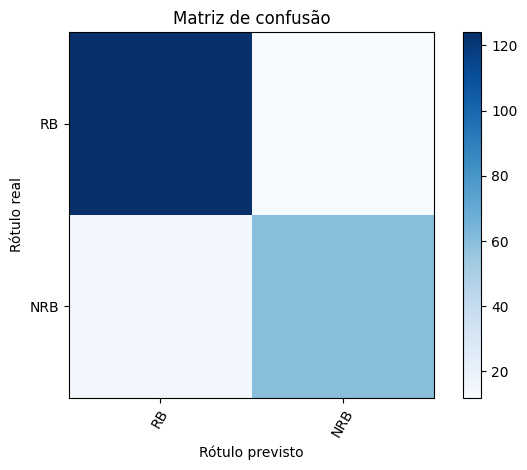


Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.89      0.91      0.90       136
           1       0.83      0.80      0.82        75

    accuracy                           0.87       211
   macro avg       0.86      0.86      0.86       211
weighted avg       0.87      0.87      0.87       211

------------------------------------------------------------------------------------------ 

>  Doping gradient trees - XGBoost: - Erro de classificação nos dados de teste: 28
>  Doping gradient trees - XGBoost- Acurácia: 0.87
Matriz de confusão:


 [[124  12]
 [ 16  59]] 



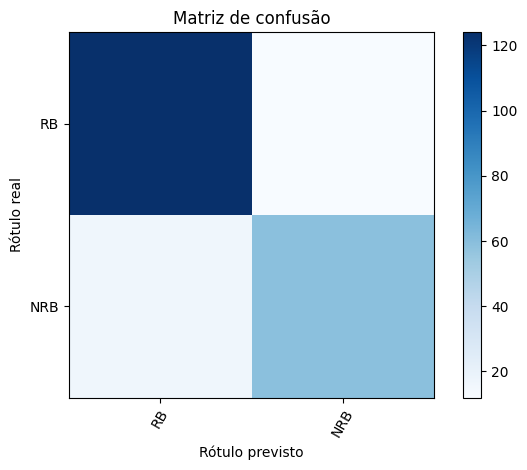


Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.89      0.91      0.90       136
           1       0.83      0.79      0.81        75

    accuracy                           0.87       211
   macro avg       0.86      0.85      0.85       211
weighted avg       0.87      0.87      0.87       211

------------------------------------------------------------------------------------------ 



In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
print("Versão de XGBoost",xgb.__version__)

# Criando uma lista de modelos
modelos = []
classificação_logistica = LogisticRegression(solver='liblinear', multi_class='ovr')
modelos.append(("Classificação logística",classificação_logistica))
forest_aleatory = RandomForestClassifier()
modelos.append(("Random forest",forest_aleatory))
doping_gradient_trees = xgb.XGBClassifier(use_label_encoder=False,eval_metric='mlogloss')
modelos.append(("Doping gradient trees - XGBoost",doping_gradient_trees))

# Ciclo de treiamento e validação cruzada
resultados = []
nomes_modelos = []
print("Treinamento de diferentes modelos...\n")
print("Resultados da validação cruzada:\n")
for nome_modelo, modelo in modelos:
    validation_cruzada = StratifiedKFold(n_splits=5,
                                         random_state=42,
                                         shuffle=True)
    resultado_vc = cross_val_score(modelo,
                                  predict_train,
                                  target_train,
                                  cv=validation_cruzada,
                                  scoring='accuracy')
    resultados.append(resultado_vc)
    nomes_modelos.append(nome_modelo)
    print('>  %s: %f (%f)' % (nome_modelo, resultado_vc.mean(), resultado_vc.std()))

print("\n","*"*100)
print("\nValidação com dados de teste...\n")
for nome_modelo, modelo in modelos:
    modelo.fit(predict_train, target_train)
    teste_predictions = modelo.predict(predict_test)
    print('>  %s: - Erro de classificação nos dados de teste: %d' %
          (nome_modelo, (target_test != teste_predictions).sum()))
    print('>  %s- Acurácia: %.2f' %
          (nome_modelo, accuracy_score(target_test, teste_predictions)))
    # Exibindo uma matriz de confusão e um relatório de classificação
    print("Matriz de confusão:\n")
    exiber_matriz_confusao(confusion_matrix(target_test, teste_predictions),['RB','NRB'])
    print("\nRelatório de Classificação:\n",classification_report(target_test, teste_predictions))
    print("-"*90,"\n")


### Conclusão

Os resultados mostram que os classificadores gerados possuem bom desempenho para esse conjunto de dado e que o valor de acurácia pode variar um pouco dependendo do modelo gerado.





## Referências

1) StackOverflow - https://stackoverflow.com

2) Pandas - tutorials - https://pandas.pydata.org/pandas-docs/stable/getting_started/tutorials.html

3) Regular expressions- http://regex101.com/ - https://www.regular-expressions.info/tutorial.html

4) Matplotlib - tutorials - https://matplotlib.org/3.1.1/tutorials/index.html

5) Scikit-Learn (ou Sklearn) - <a href="https://scikit-learn.org/stable/">Scikit-Learn</a>

In [50]:
print("Jupyter notebook concluído")

Jupyter notebook concluído
